# Data Loading and Initial Overview

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (classification_report,confusion_matrix, accuracy_score,
    precision_score,recall_score, f1_score, roc_auc_score, roc_curve
)

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [ ]:
file_path = Bank_Customer_Churn_Prediction_Dataset.csv'
df = pd.read_csv(file_path)
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
df.describe(include='all')

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [ ]:
print("Number of unique values in every columns: \n", df.nunique())

Number of unique values in every columns: 
 customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64


In [ ]:
print("Number of null values in every column:\n",df.isnull().sum())

Number of null values in every column:
 customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [ ]:
print("Total duplicate rows:", df.duplicated().sum())

Total duplicate rows: 0


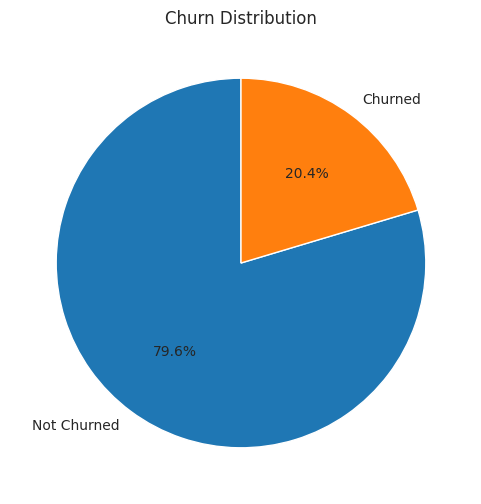

In [ ]:
import matplotlib.pyplot as plt
counts = df['churn'].value_counts()

labels = ['Not Churned', 'Churned']

plt.figure(figsize=(6,6))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Churn Distribution')
plt.show()

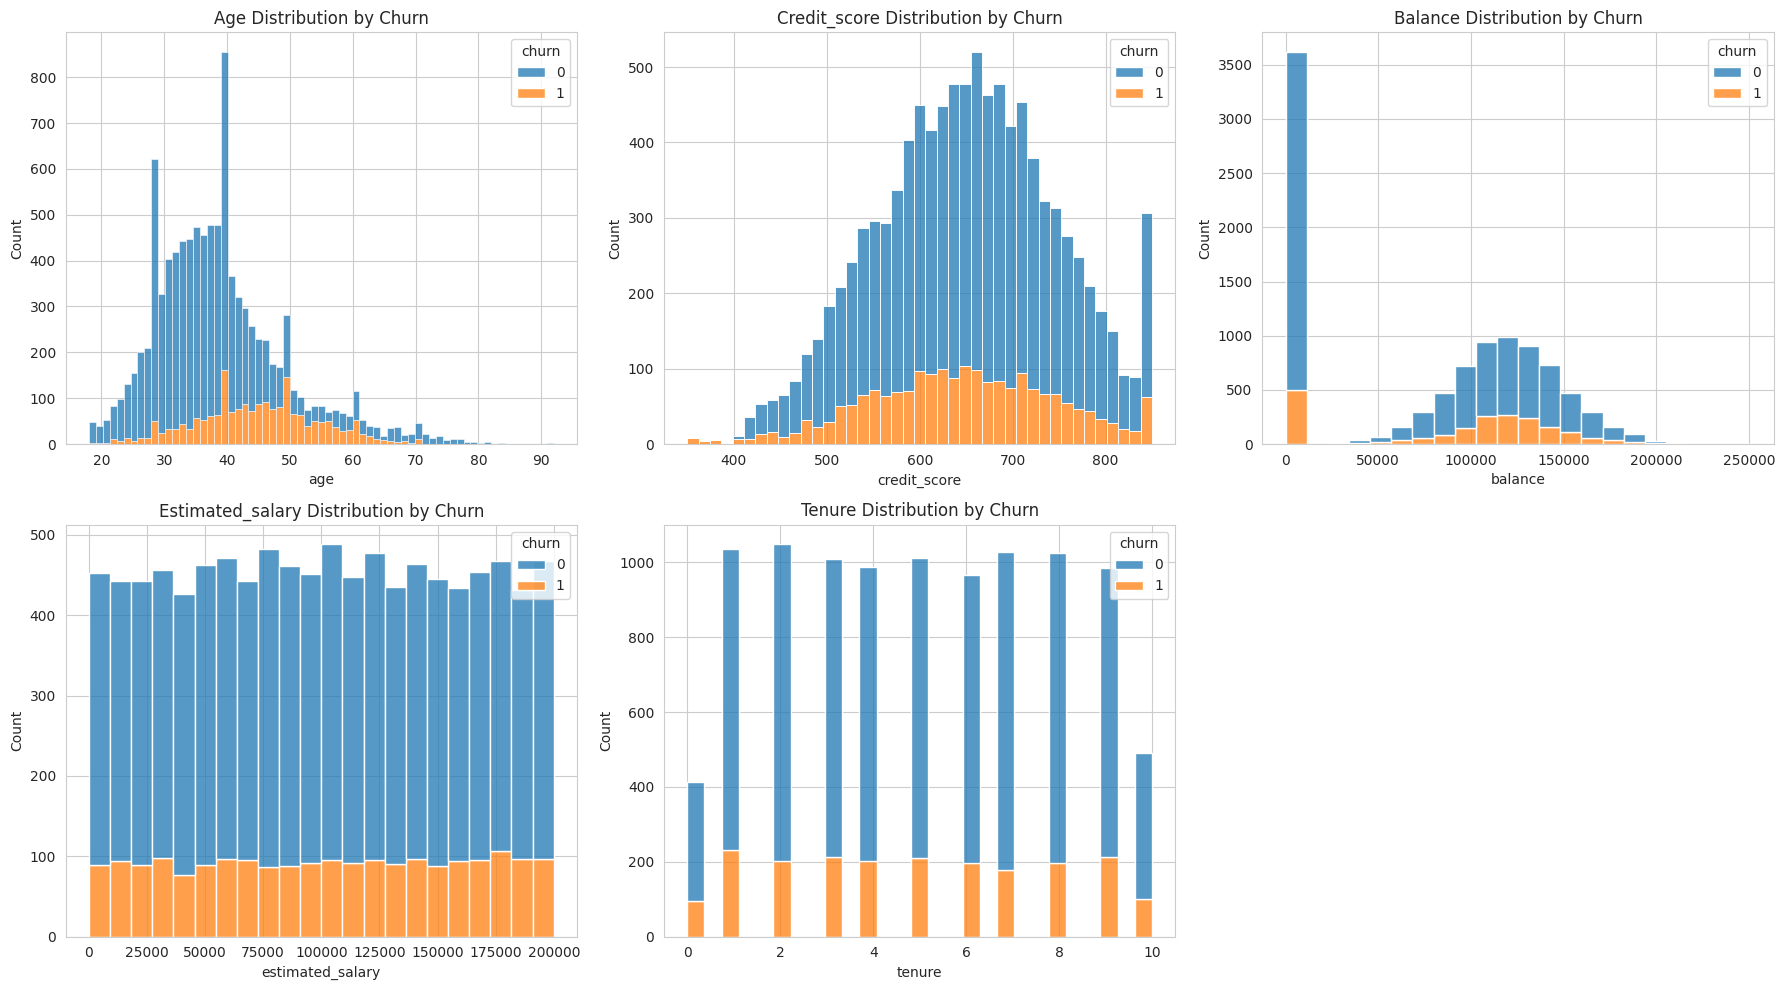

In [ ]:
num_cols = ['age', 'credit_score', 'balance', 'estimated_salary', 'tenure']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, hue='churn', multiple='stack', ax=axes[i])
    axes[i].set_title(f'{col.capitalize()} Distribution by Churn')

axes[5].axis('off')
plt.tight_layout()
plt.show()

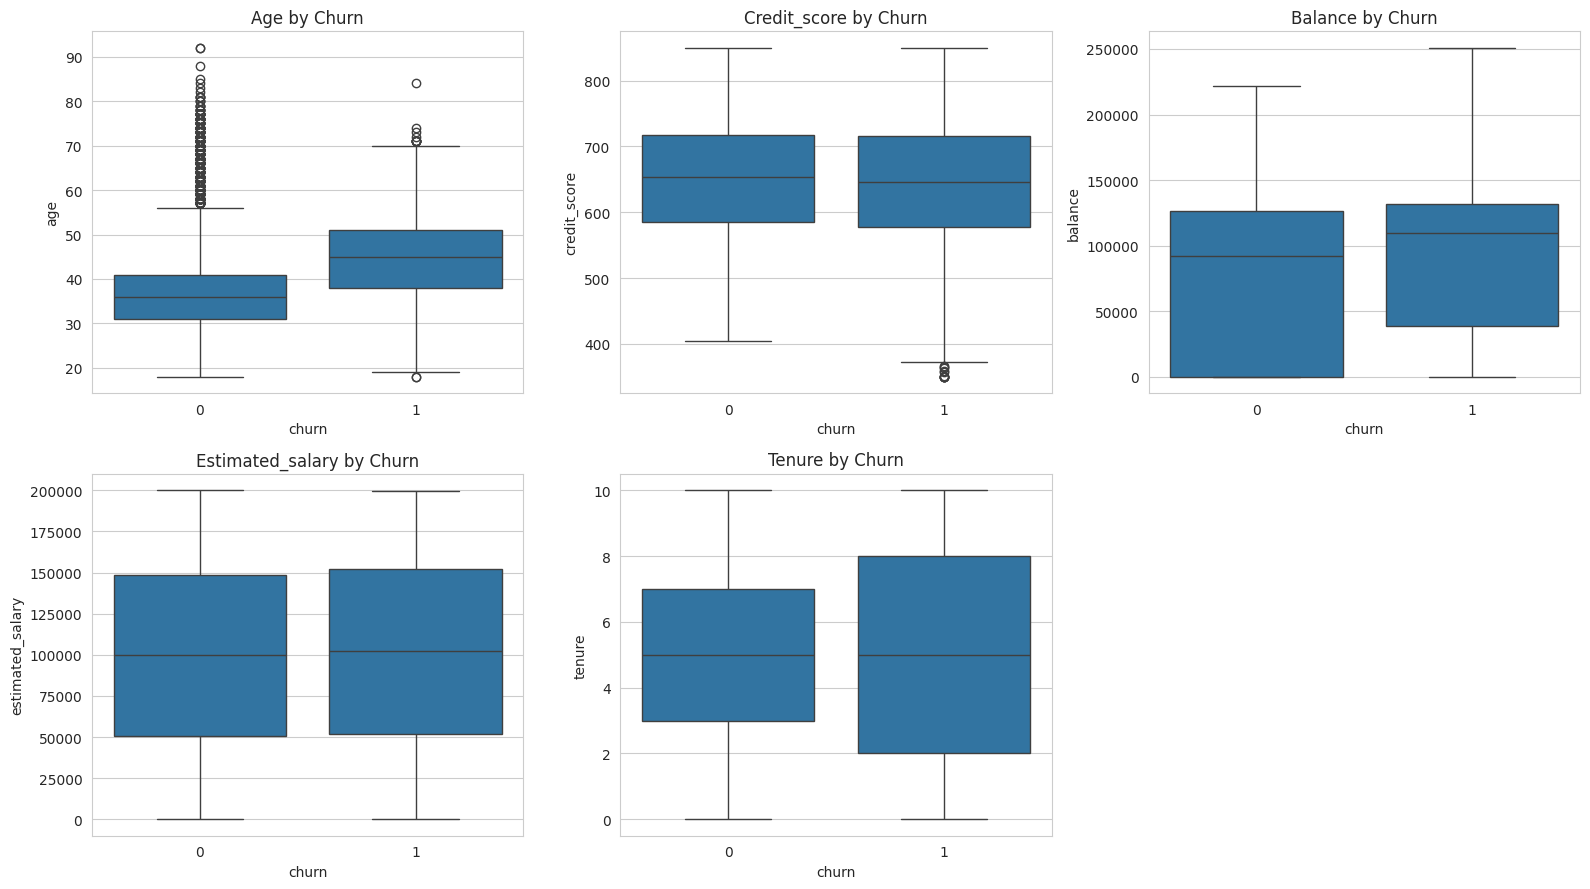

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(16, 9))
axes = axes.ravel()

for i, col in enumerate(num_cols):
    sns.boxplot(x='churn', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col.capitalize()} by Churn')

axes[5].axis('off')
plt.tight_layout()
plt.show()

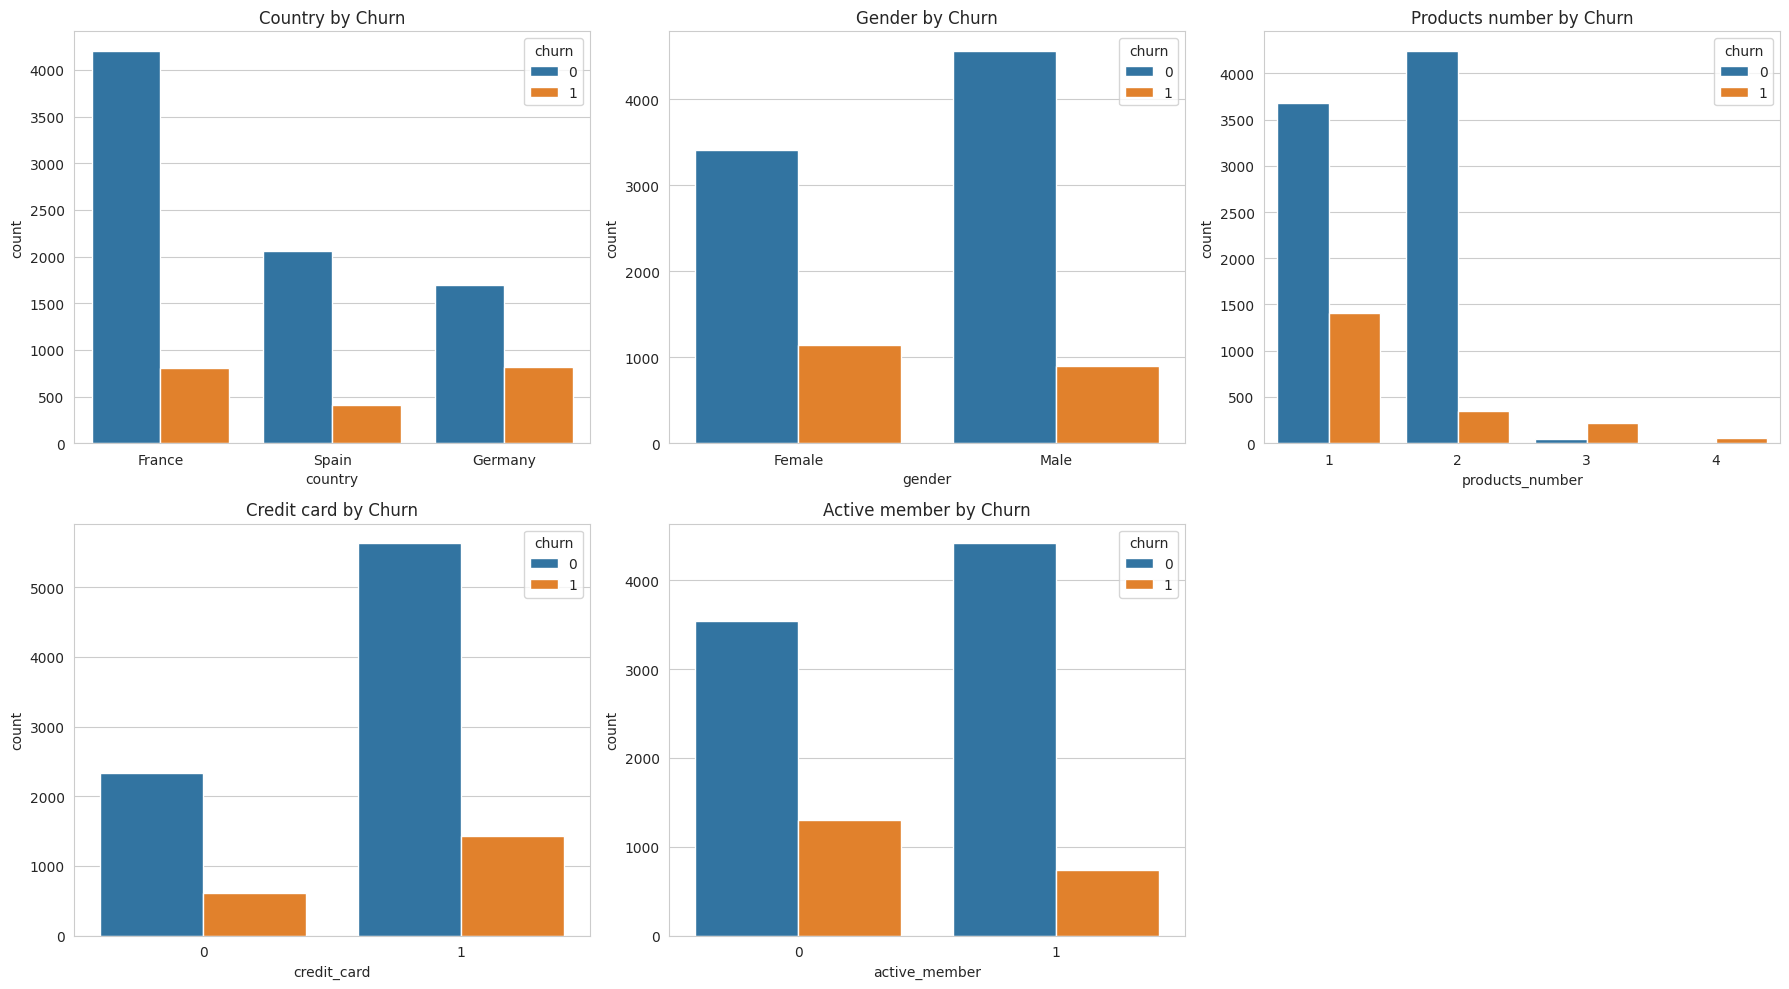

In [ ]:
cat_cols = ['country', 'gender', 'products_number', 'credit_card', 'active_member']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, hue='churn', data=df, ax=axes[i])
    axes[i].set_title(f'{col.replace("_", " ").capitalize()} by Churn')

axes[5].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
def count_outliers(df):
    numeric_df = df.select_dtypes(include=np.number)
    numeric_df = numeric_df[[col for col in numeric_df.columns if set(numeric_df[col].dropna().unique()) != {0, 1}]]
    outlier_cols = []
    for col in numeric_df.columns:
        Q1 = numeric_df[col].quantile(0.25)
        Q3 = numeric_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = numeric_df[(numeric_df[col] < lower) | (numeric_df[col] > upper)][col]
        print(f"{col}: {len(outliers)} outliers")
        if len(outliers) > 0:
            outlier_cols.append(col)
    return outlier_cols

outlier_cols = count_outliers(df)
outliers = outlier_cols

customer_id: 0 outliers
credit_score: 15 outliers
age: 359 outliers
tenure: 0 outliers
balance: 0 outliers
products_number: 60 outliers
estimated_salary: 0 outliers


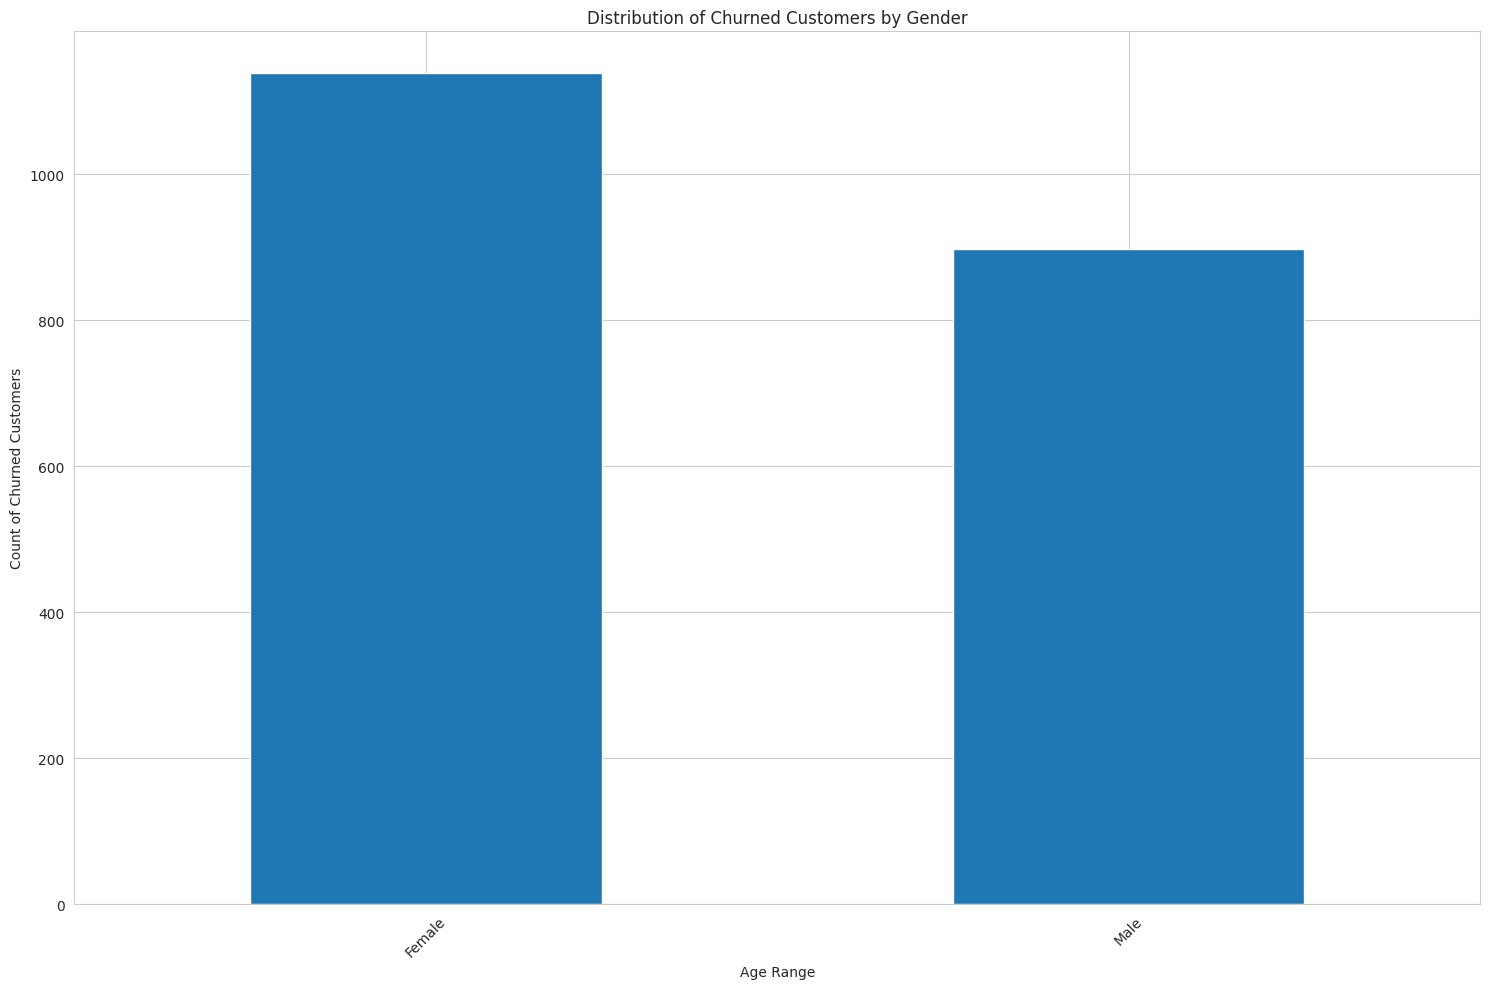

In [ ]:
df[df['churn']==1].groupby('gender')['churn'].count().plot(kind='bar')

plt.xlabel("Age Range")
plt.ylabel("Count of Churned Customers")
plt.title("Distribution of Churned Customers by Gender")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-45379055.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_dist = df[df['churn'] == 1].groupby(age_bins)['age'].count()


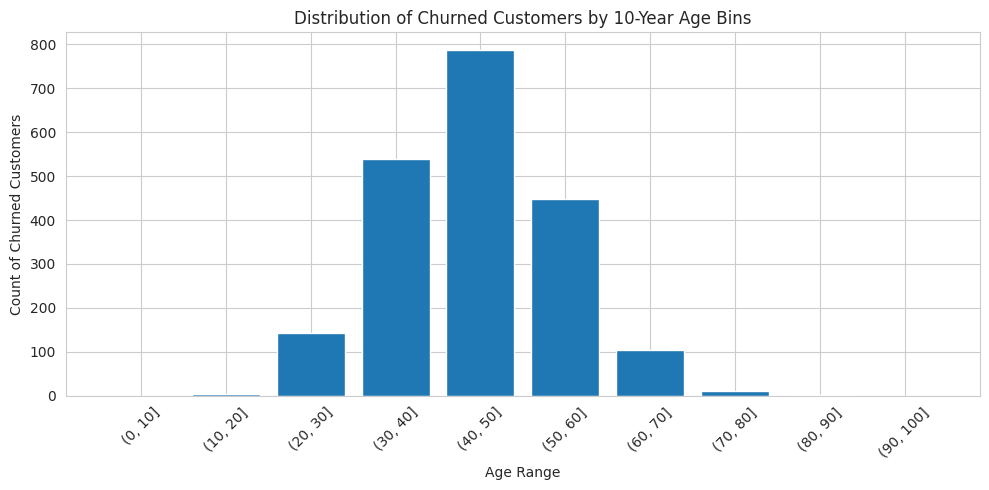

In [ ]:
bins = range(0, df['age'].max() + 10, 10)
age_bins = pd.cut(df['age'], bins=bins)

# Get counts of churned customers per bin
churn_dist = df[df['churn'] == 1].groupby(age_bins)['age'].count()

# Plot
plt.figure(figsize=(10,5))
plt.bar(churn_dist.index.astype(str), churn_dist.values)

plt.xlabel("Age Range")
plt.ylabel("Count of Churned Customers")
plt.title("Distribution of Churned Customers by 10-Year Age Bins")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


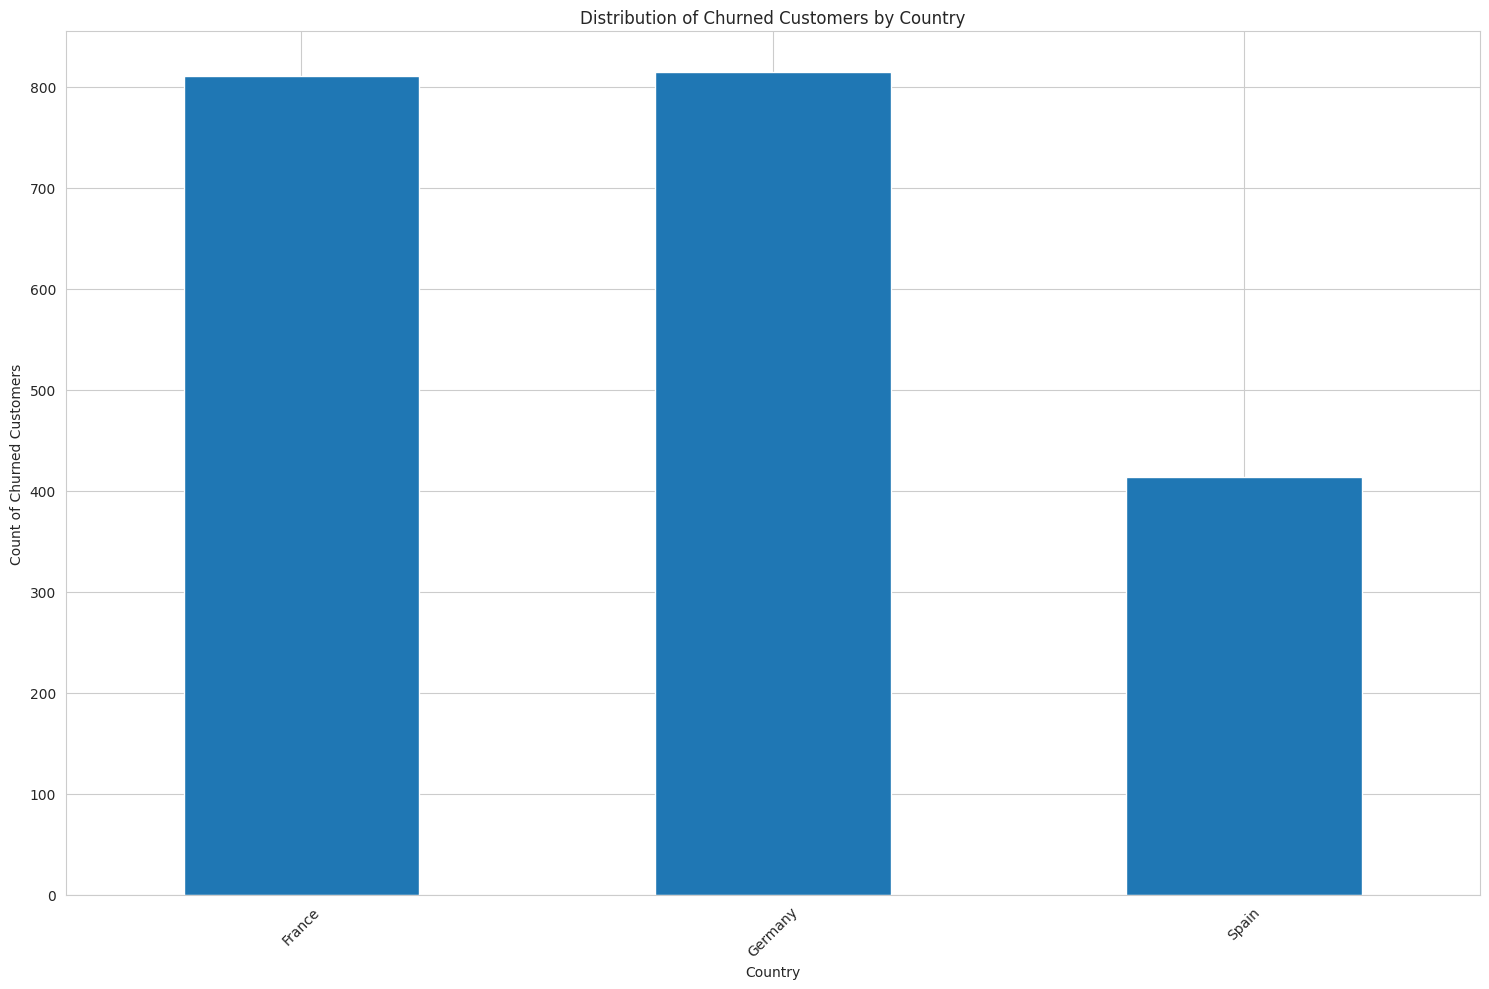

In [ ]:
df[df['churn']==1].groupby('country')['churn'].count().plot(kind='bar')

plt.title("Distribution of Churned Customers by Country")
plt.xlabel("Country")
plt.ylabel("Count of Churned Customers")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-369343950.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_dist = df[df['churn'] == 1].groupby(credit_score_bins)['credit_score'].count()


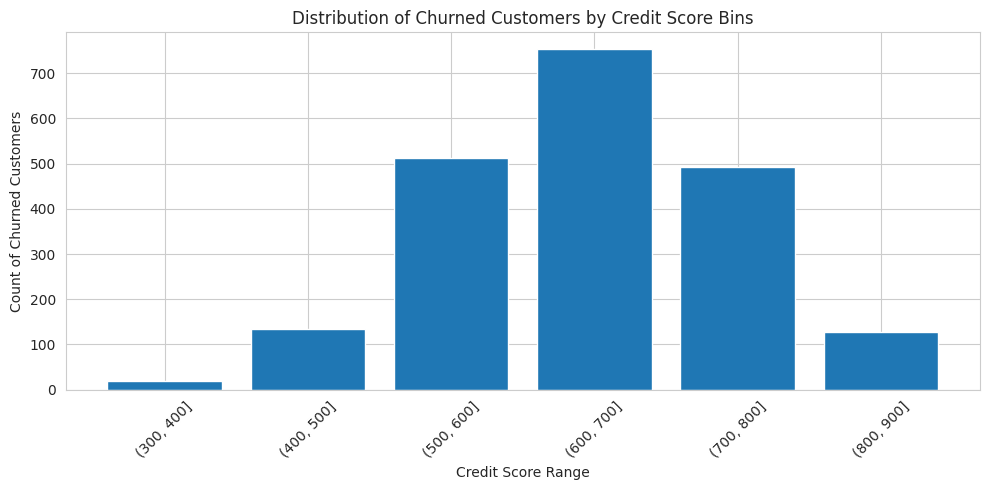

In [ ]:
bins = range(300, df['credit_score'].max() + 100, 100)
credit_score_bins = pd.cut(df['credit_score'], bins=bins)

# Get counts of churned customers per bin
churn_dist = df[df['churn'] == 1].groupby(credit_score_bins)['credit_score'].count()

# Plot
plt.figure(figsize=(10,5))
plt.bar(churn_dist.index.astype(str), churn_dist.values)

plt.xlabel("Credit Score Range")
plt.ylabel("Count of Churned Customers")
plt.title("Distribution of Churned Customers by Credit Score Bins")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2395051839.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_dist = df[df['churn'] == 1].groupby(balance_bins)['balance'].count()


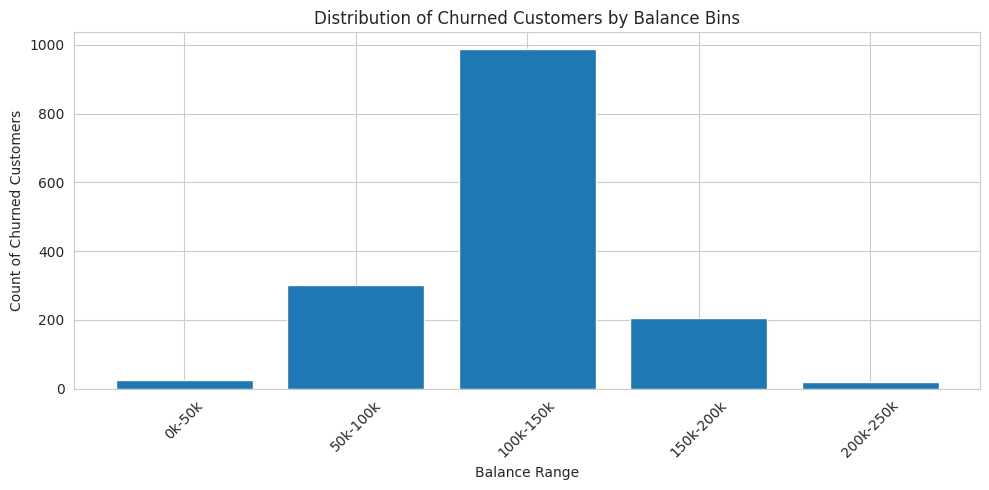

In [ ]:
# Create 50k balance bins on the fly
bins = range(0, int(df['balance'].max()) + 10000, 50000)
balance_bins = pd.cut(df['balance'], bins=bins)

# Get counts of churned customers per bin
churn_dist = df[df['churn'] == 1].groupby(balance_bins)['balance'].count()

# Create labels like "0k-50k", "50k-100k", ...
labels = [f"{int(interval.left/1000)}k-{int(interval.right/1000)}k" for interval in churn_dist.index]

# Plot
plt.figure(figsize=(10,5))
plt.bar(labels, churn_dist.values)

plt.xlabel("Balance Range")
plt.ylabel("Count of Churned Customers")
plt.title("Distribution of Churned Customers by Balance Bins")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


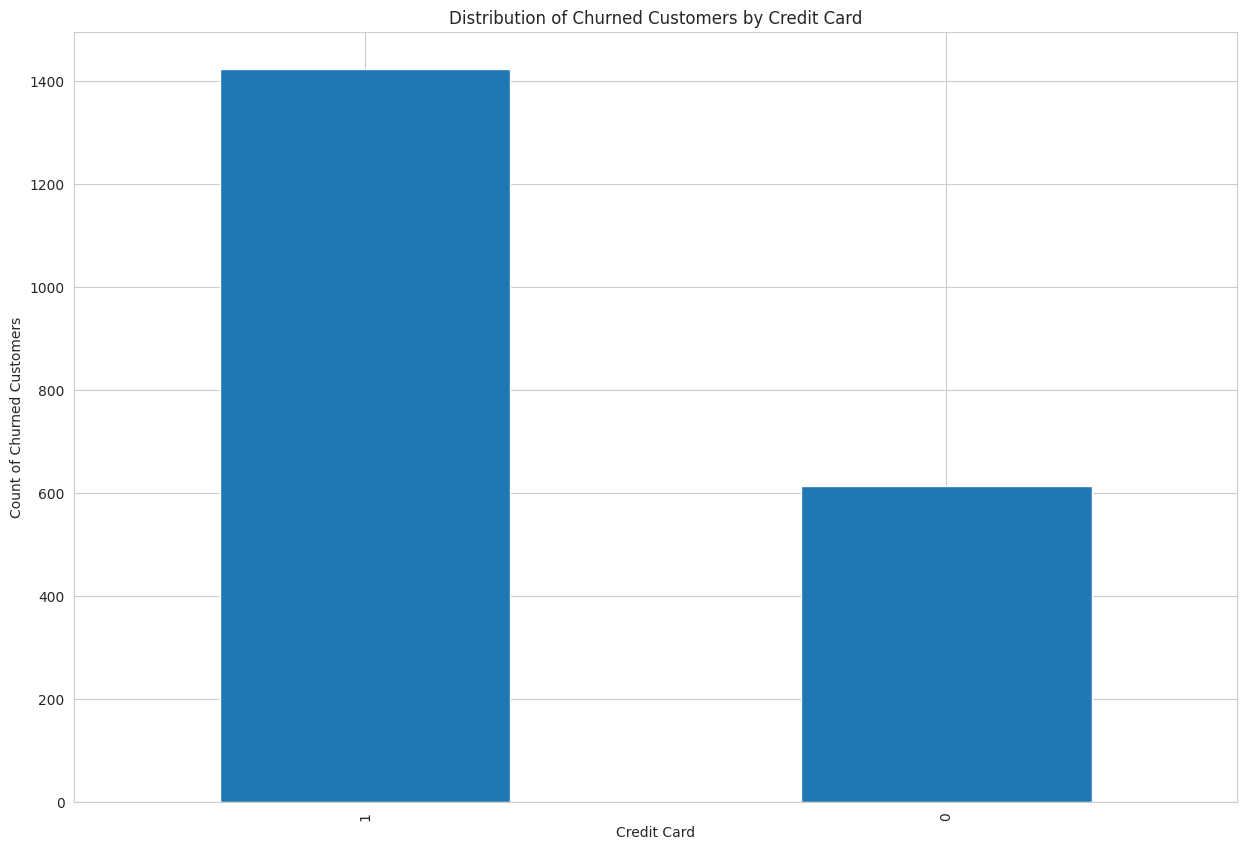

In [ ]:
df[df['churn']==1]['credit_card'].value_counts().plot(kind='bar')

plt.xlabel('Credit Card')
plt.ylabel('Count of Churned Customers')
plt.title('Distribution of Churned Customers by Credit Card')
plt.show()

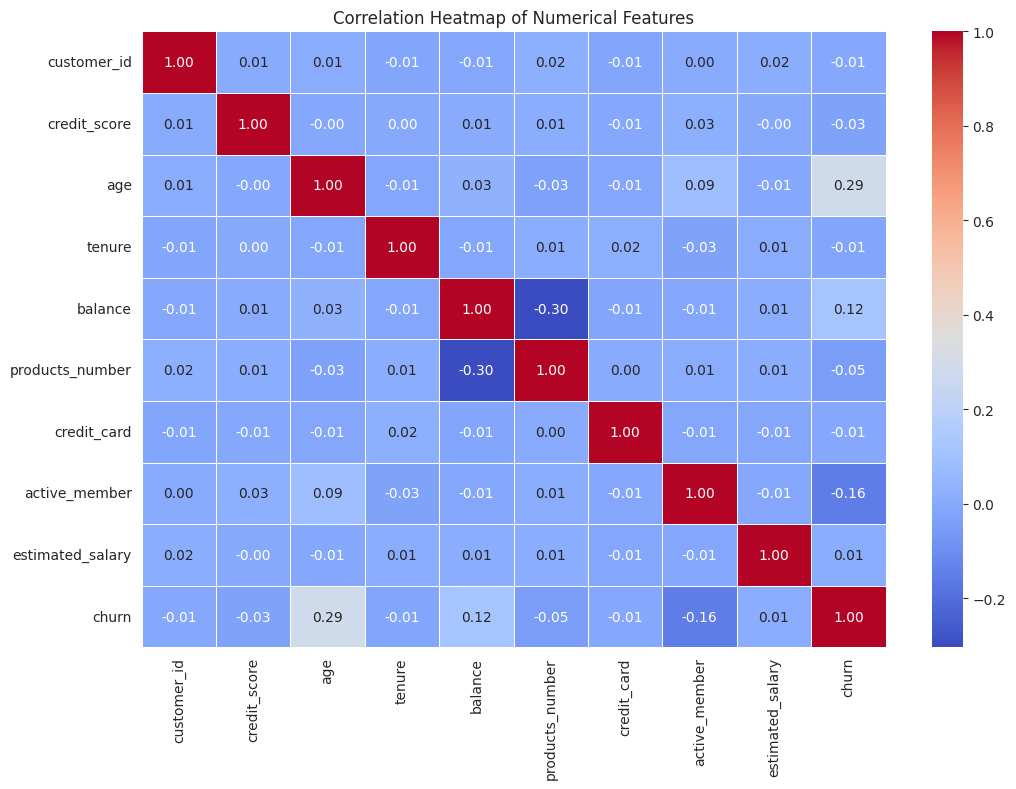

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Numerical Features")
plt.show()


# Preprocessing and Feature Engineering

*Applied one hot encoding to "gender" and "country" columns*

In [ ]:
cols_to_encode = [col for col in ['gender', 'country'] if col in df.columns]

if cols_to_encode:
    df = pd.get_dummies(df, columns=cols_to_encode, drop_first=False)
else:
    print("Columns 'gender' and 'country' already processed into dummy variables.")


dummy_cols = [col for col in df.columns if col.startswith('gender_') or col.startswith('country_')]
for col in dummy_cols:
    if col in df.columns and df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

df.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_Female,gender_Male,country_France,country_Germany,country_Spain
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


*Applied StandardScaler to key numerical features to normalize their scales*

In [ ]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['estimated_salary', 'balance', 'credit_score', 'age', 'products_number', 'tenure']

scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print(f"Scaled {len(columns_to_scale)} features:")
print(columns_to_scale)

Scaled 6 features:
['estimated_salary', 'balance', 'credit_score', 'age', 'products_number', 'tenure']


In [ ]:
df.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_Female,gender_Male,country_France,country_Germany,country_Spain
0,15634602,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,1,0,1,0,0
1,15647311,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,1,0,0,0,1
2,15619304,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,1,0,1,0,0
3,15701354,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,1,0,1,0,0
4,15737888,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,1,0,0,0,1


# Class Imabalance Handling and Perfromace Comparison

*Applied smote and evalueted performance*

--------------------------------------------------------------------------------
SMOTE TECHNIQUE
--------------------------------------------------------------------------------


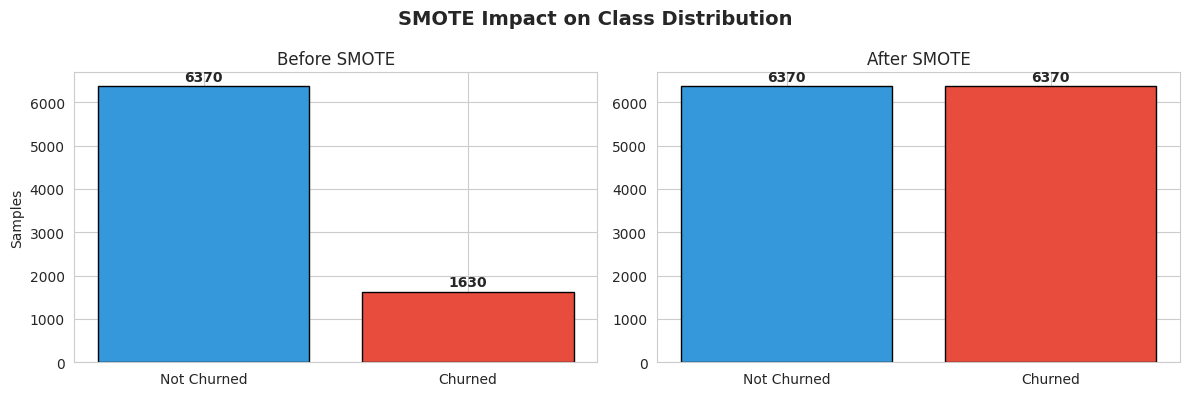


Results with SMOTE:
              Model      SMOTE  Accuracy  Precision  Recall  F1-Score  ROC-AUC
Logistic Regression With SMOTE    0.7260     0.3930  0.6364    0.4859   0.7571
      Random Forest With SMOTE    0.8495     0.6606  0.5356    0.5916   0.8560
            XGBoost With SMOTE    0.8610     0.6972  0.5602    0.6213   0.8626
           LightGBM With SMOTE    0.8625     0.7102  0.5479    0.6186   0.8637
  Gradient Boosting With SMOTE    0.8605     0.7078  0.5356    0.6098   0.8610

--------------------------------------------------------------------------------


In [ ]:
# Prepare data
X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 10)

print("-"*80)
print("SMOTE TECHNIQUE")
print("-"*80)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('SMOTE Impact on Class Distribution', fontsize=14, fontweight='bold')

colors = ['#3498db', '#e74c3c']
labels = ['Not Churned', 'Churned']

before = y_train.value_counts().sort_index()
axes[0].bar(labels, before.values, color=colors, edgecolor='black')
axes[0].set_title('Before SMOTE', fontsize=12)
axes[0].set_ylabel('Samples')
for i, v in enumerate(before.values):
    axes[0].text(i, v + before.max() * 0.02, str(v), ha='center', fontweight='bold')

after = pd.Series(y_train_smote).value_counts().sort_index()
axes[1].bar(labels, after.values, color=colors, edgecolor='black')
axes[1].set_title('After SMOTE', fontsize=12)
for i, v in enumerate(after.values):
    axes[1].text(i, v + after.max() * 0.02, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Define models with optimized hyperparameters
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, C=1.0),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100, max_depth=15,
                                           min_samples_split=20, min_samples_leaf=10,
                                           max_features='sqrt', max_samples=0.8),
    'XGBoost': XGBClassifier(random_state=42, max_depth=5, learning_rate=0.05,
                            subsample=0.8, colsample_bytree=0.8, reg_alpha=0.1,
                            reg_lambda=1.0, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=42, max_depth=6, learning_rate=0.05,
                              min_child_samples=30, subsample=0.8, colsample_bytree=0.8,
                              reg_alpha=0.1, reg_lambda=0.1, verbose=-1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, max_depth=5,
                                                    subsample=0.8, min_samples_split=20,
                                                    min_samples_leaf=10)
}

# Train with SMOTE data
results = []
predictions = {}

for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    results.append({
        'Model': name,
        'SMOTE': 'With SMOTE',
        'Accuracy': round(accuracy_score(y_test, y_pred), 4),
        'Precision': round(precision_score(y_test, y_pred), 4),
        'Recall': round(recall_score(y_test, y_pred), 4),
        'F1-Score': round(f1_score(y_test, y_pred), 4),
        'ROC-AUC': round(roc_auc_score(y_test, y_proba), 4)
    })
    predictions[f"{name}_With SMOTE"] = (y_pred, y_proba)

results_df = pd.DataFrame(results)
print("\nResults with SMOTE:")
print(results_df.to_string(index=False))
print("\n" + "-"*80)

*Applied class weight and evalueted performance*

In [ ]:
# Class Weight Adjustment - No data modification needed
print("-"*80)
print("CLASS WEIGHT ADJUSTMENT TECHNIQUE")
print("-"*80)
print("This technique adjusts model's loss function to penalize minority class errors more.")
print("No synthetic data is created - just uses weighted training.")

# Define models with class_weight='balanced'
models_weighted = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100, max_depth=15,
                                           min_samples_split=20, min_samples_leaf=10,
                                           max_features='sqrt', class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, max_depth=5,
                                                    subsample=0.8, min_samples_split=20,
                                                    min_samples_leaf=10)
}

# XGBoost and LightGBM use different parameter for class weights
scale_pos_weight = (y_train.value_counts()[0] / y_train.value_counts()[1])

models_weighted['XGBoost'] = XGBClassifier(random_state=42, max_depth=5, learning_rate=0.05,
                                           subsample=0.8, colsample_bytree=0.8,
                                           reg_alpha=0.1, reg_lambda=1.0,
                                           scale_pos_weight=scale_pos_weight,
                                           eval_metric='logloss')

models_weighted['LightGBM'] = LGBMClassifier(random_state=42, max_depth=6, learning_rate=0.05,
                                            min_child_samples=30, subsample=0.8,
                                            colsample_bytree=0.8, reg_alpha=0.1, reg_lambda=0.1,
                                            class_weight='balanced', verbose=-1)

# Train and evaluate
results_weighted = []

for name, model in models_weighted.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    results_weighted.append({
        'Model': name,
        'Technique': 'Class Weight',
        'Accuracy': round(accuracy_score(y_test, y_pred), 4),
        'Precision': round(precision_score(y_test, y_pred), 4),
        'Recall': round(recall_score(y_test, y_pred), 4),
        'F1-Score': round(f1_score(y_test, y_pred), 4),
        'ROC-AUC': round(roc_auc_score(y_test, y_proba), 4)
    })

results_weighted_df = pd.DataFrame(results_weighted)
print("\nResults:")
print(results_weighted_df.to_string(index=False))
print("\n" + "-"*80)

--------------------------------------------------------------------------------
CLASS WEIGHT ADJUSTMENT TECHNIQUE
--------------------------------------------------------------------------------
This technique adjusts model's loss function to penalize minority class errors more.
No synthetic data is created - just uses weighted training.

Results:
              Model    Technique  Accuracy  Precision  Recall  F1-Score  ROC-AUC
Logistic Regression Class Weight    0.7075     0.3784  0.6806    0.4864   0.7550
      Random Forest Class Weight    0.8280     0.5642  0.6806    0.6169   0.8555
  Gradient Boosting Class Weight    0.8690     0.7799  0.4963    0.6066   0.8602
            XGBoost Class Weight    0.8060     0.5161  0.7494    0.6112   0.8668
           LightGBM Class Weight    0.8035     0.5119  0.7420    0.6058   0.8614

--------------------------------------------------------------------------------


*Applied smote+tomek and evalueted performance*

--------------------------------------------------------------------------------
SMOTE + TOMEK LINKS TECHNIQUE
--------------------------------------------------------------------------------
This technique combines over-sampling (SMOTE) and under-sampling (Tomek Links).
SMOTE creates synthetic minority samples, then Tomek removes noisy borderline samples.

Original training set: 8000 samples
After SMOTE+Tomek: 9478 samples
Class distribution: {1: 4739, 0: 4739}


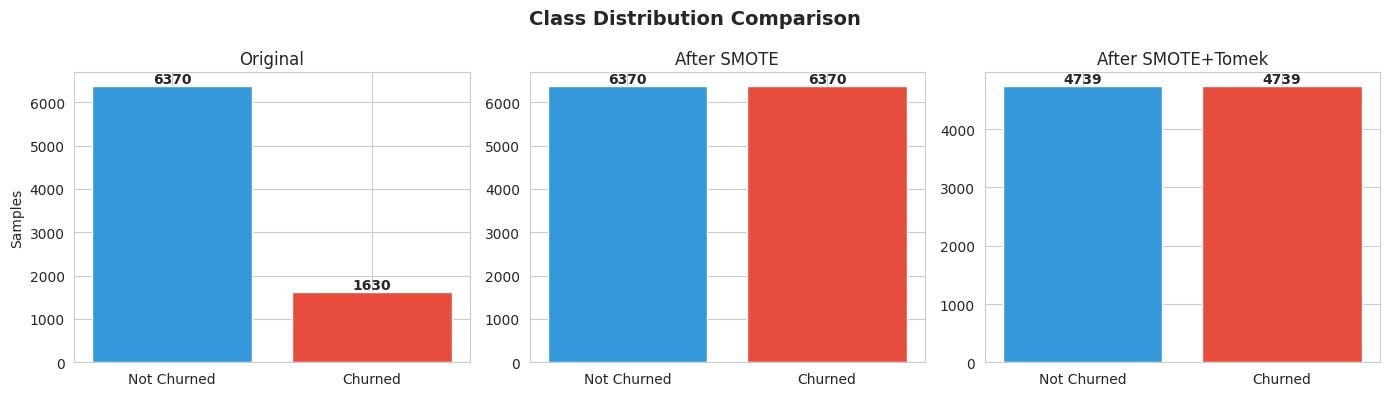


Results:
              Model   Technique  Accuracy  Precision  Recall  F1-Score  ROC-AUC
Logistic Regression SMOTE+Tomek    0.7255     0.3924  0.6364    0.4855   0.7573
      Random Forest SMOTE+Tomek    0.8455     0.6561  0.5061    0.5714   0.8508
            XGBoost SMOTE+Tomek    0.8610     0.6985  0.5577    0.6202   0.8624
           LightGBM SMOTE+Tomek    0.8590     0.6972  0.5430    0.6105   0.8619
  Gradient Boosting SMOTE+Tomek    0.8610     0.7074  0.5405    0.6128   0.8594

--------------------------------------------------------------------------------


In [ ]:
# SMOTE + Tomek Links (Hybrid approach)
print("-"*80)
print("SMOTE + TOMEK LINKS TECHNIQUE")
print("-"*80)
print("This technique combines over-sampling (SMOTE) and under-sampling (Tomek Links).")
print("SMOTE creates synthetic minority samples, then Tomek removes noisy borderline samples.")

# Apply SMOTETomek
smotetomek = SMOTETomek(random_state=42)
X_train_smotetomek, y_train_smotetomek = smotetomek.fit_resample(X_train, y_train)

print(f"\nOriginal training set: {len(y_train)} samples")
print(f"After SMOTE+Tomek: {len(y_train_smotetomek)} samples")
print(f"Class distribution: {pd.Series(y_train_smotetomek).value_counts().to_dict()}")

# Visualize distribution
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
fig.suptitle('Class Distribution Comparison', fontsize=14, fontweight='bold')

colors = ['#3498db', '#e74c3c']
labels = ['Not Churned', 'Churned']

before = y_train.value_counts().sort_index()
axes[0].bar(labels, before.values, color=colors, edgecolor='white')
axes[0].set_title('Original')
axes[0].set_ylabel('Samples')
for i, v in enumerate(before.values):
    axes[0].text(i, v + before.max() * 0.01, str(v), ha='center', fontweight='bold')

after_smote = pd.Series(y_train_smote).value_counts().sort_index()
axes[1].bar(labels, after_smote.values, color=colors, edgecolor='white')
axes[1].set_title('After SMOTE')
for i, v in enumerate(after_smote.values):
    axes[1].text(i, v + after_smote.max() * 0.01, str(v), ha='center', fontweight='bold')

# SMOTE + Tomek
after_smotetomek = pd.Series(y_train_smotetomek).value_counts().sort_index()
axes[2].bar(labels, after_smotetomek.values, color=colors, edgecolor='white')
axes[2].set_title('After SMOTE+Tomek')
for i, v in enumerate(after_smotetomek.values):
    axes[2].text(i, v + after_smotetomek.max() * 0.01, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Define models
models_smotetomek = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, C=1.0),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100, max_depth=15,
                                           min_samples_split=20, min_samples_leaf=10,
                                           max_features='sqrt', max_samples=0.8),
    'XGBoost': XGBClassifier(random_state=42, max_depth=5, learning_rate=0.05,
                            subsample=0.8, colsample_bytree=0.8, reg_alpha=0.1,
                            reg_lambda=1.0, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=42, max_depth=6, learning_rate=0.05,
                              min_child_samples=30, subsample=0.8, colsample_bytree=0.8,
                              reg_alpha=0.1, reg_lambda=0.1, verbose=-1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, max_depth=5,
                                                    subsample=0.8, min_samples_split=20,
                                                    min_samples_leaf=10)
}

# Train and evaluate
results_smotetomek = []

for name, model in models_smotetomek.items():
    model.fit(X_train_smotetomek, y_train_smotetomek)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    results_smotetomek.append({
        'Model': name,
        'Technique': 'SMOTE+Tomek',
        'Accuracy': round(accuracy_score(y_test, y_pred), 4),
        'Precision': round(precision_score(y_test, y_pred), 4),
        'Recall': round(recall_score(y_test, y_pred), 4),
        'F1-Score': round(f1_score(y_test, y_pred), 4),
        'ROC-AUC': round(roc_auc_score(y_test, y_proba), 4)
    })

results_smotetomek_df = pd.DataFrame(results_smotetomek)
print("\nResults:")
print(results_smotetomek_df.to_string(index=False))
print("\n" + "-"*80)

*Comparison analysis of three different class imbalance handling techniques and recommendation for each model*

--------------------------------------------------------------------------------
COMPARISON OF CLASS IMBALANCE HANDLING TECHNIQUES
--------------------------------------------------------------------------------

Complete Results:
              Model    Technique  Accuracy  Precision  Recall  F1-Score  ROC-AUC
Logistic Regression        SMOTE    0.7260     0.3930  0.6364    0.4859   0.7571
      Random Forest        SMOTE    0.8495     0.6606  0.5356    0.5916   0.8560
            XGBoost        SMOTE    0.8610     0.6972  0.5602    0.6213   0.8626
           LightGBM        SMOTE    0.8625     0.7102  0.5479    0.6186   0.8637
  Gradient Boosting        SMOTE    0.8605     0.7078  0.5356    0.6098   0.8610
Logistic Regression Class Weight    0.7075     0.3784  0.6806    0.4864   0.7550
      Random Forest Class Weight    0.8280     0.5642  0.6806    0.6169   0.8555
  Gradient Boosting Class Weight    0.8690     0.7799  0.4963    0.6066   0.8602
            XGBoost Class Weight    0.80

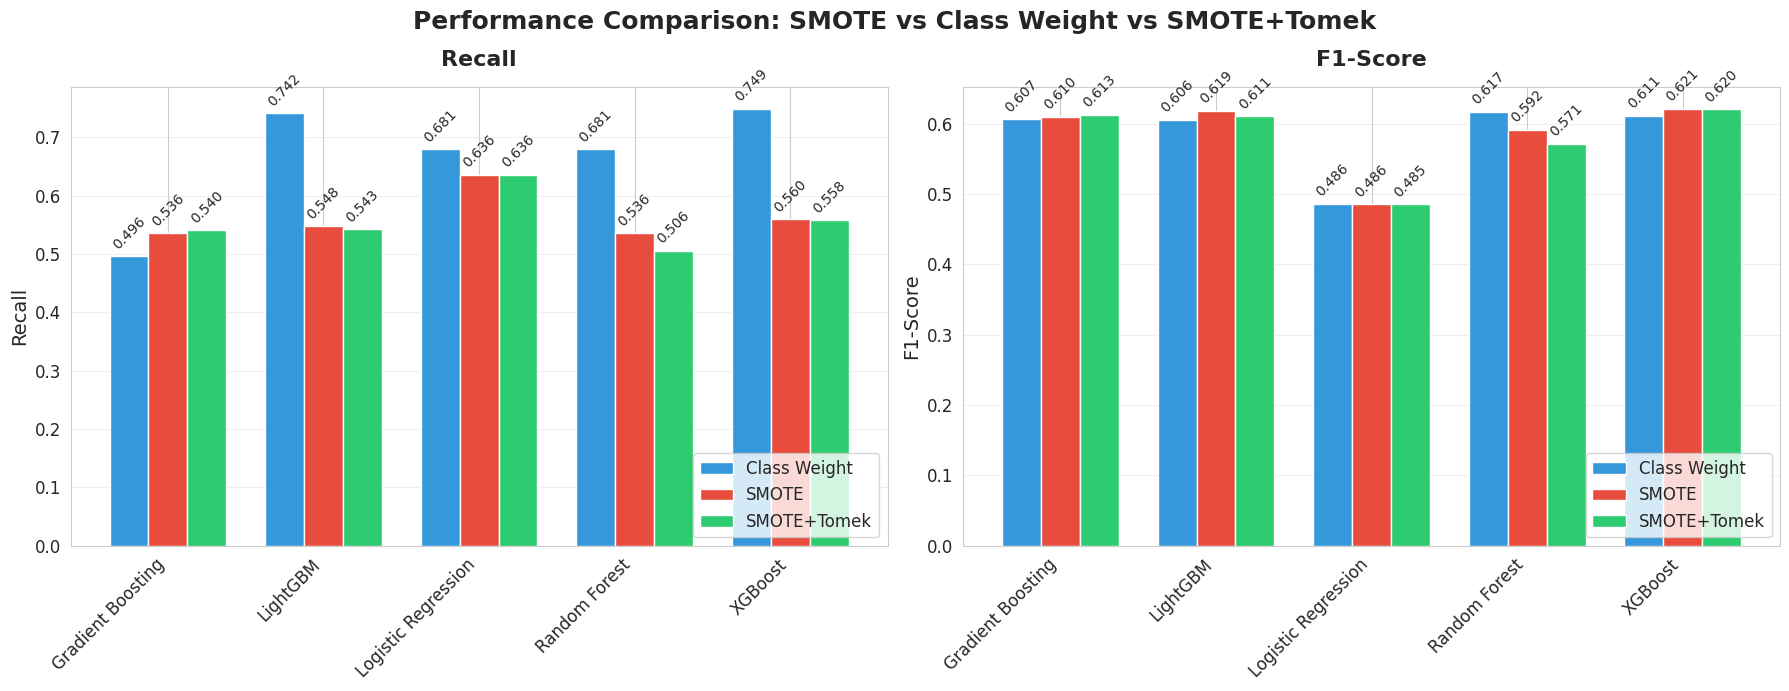

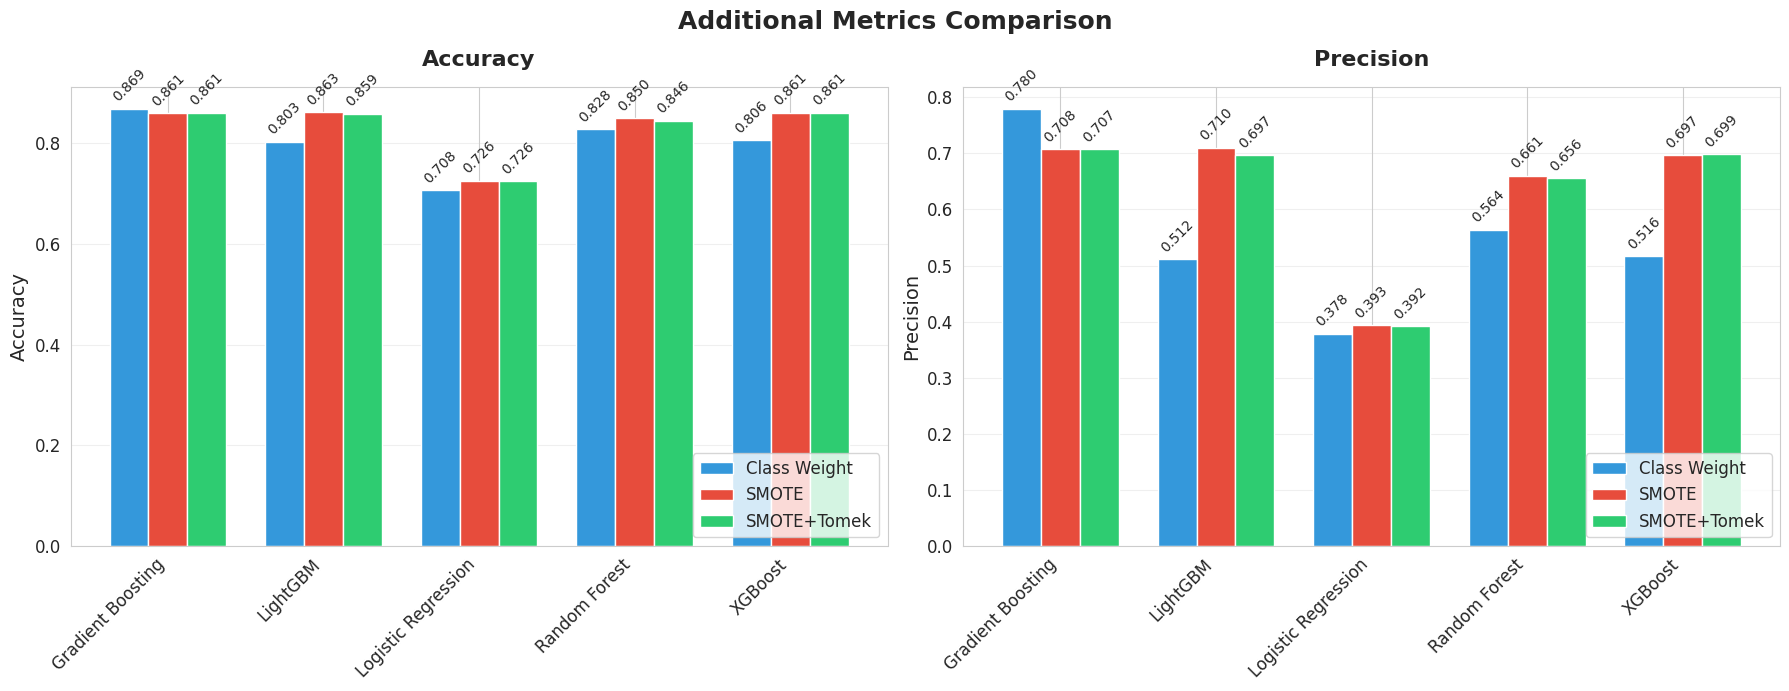

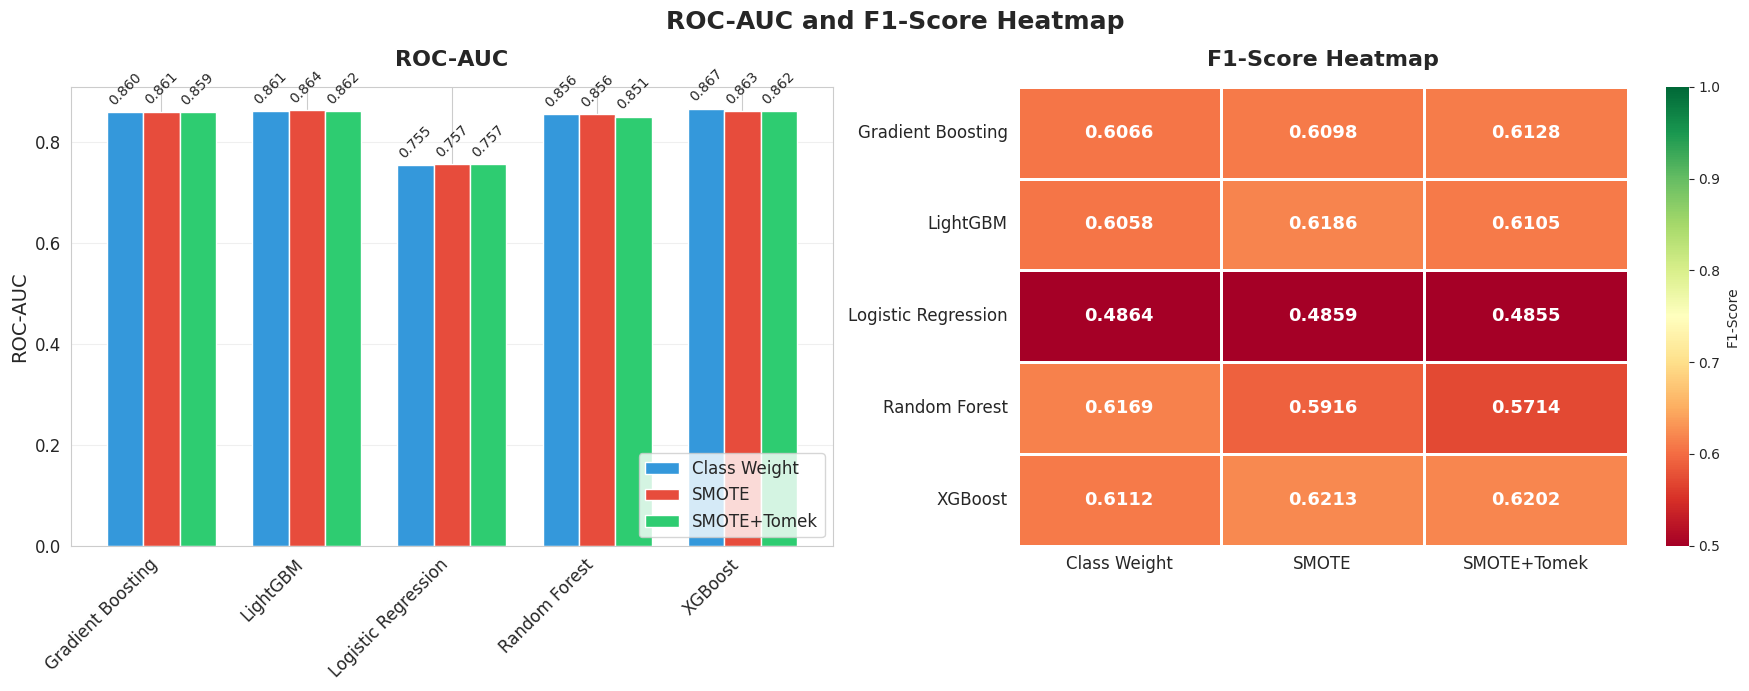


--------------------------------------------------------------------------------
BEST TECHNIQUE FOR EACH MODEL (Based on F1-Score)
--------------------------------------------------------------------------------
Logistic Regression : Class Weight    (F1=0.4864)
Random Forest       : Class Weight    (F1=0.6169)
XGBoost             : SMOTE           (F1=0.6213)
LightGBM            : SMOTE           (F1=0.6186)
Gradient Boosting   : SMOTE+Tomek     (F1=0.6128)

--------------------------------------------------------------------------------
BEST TECHNIQUE FOR EACH MODEL (Based on Recall - Minimizing False Negatives)
--------------------------------------------------------------------------------
Logistic Regression : Class Weight    (Recall=0.6806, catches 68.1% of churners)
Random Forest       : Class Weight    (Recall=0.6806, catches 68.1% of churners)
XGBoost             : Class Weight    (Recall=0.7494, catches 74.9% of churners)
LightGBM            : Class Weight    (Recall=0.7420, 

In [ ]:
print("-"*80)
print("COMPARISON OF CLASS IMBALANCE HANDLING TECHNIQUES")
print("-"*80)

# Gather results from SMOTE
results_smote = []
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost', 'LightGBM', 'Gradient Boosting']

for name in model_names:
    row = results_df[(results_df['Model'] == name) & (results_df['SMOTE'] == 'With SMOTE')].iloc[0]
    results_smote.append({
        'Model': name,
        'Technique': 'SMOTE',
        'Accuracy': row['Accuracy'],
        'Precision': row['Precision'],
        'Recall': row['Recall'],
        'F1-Score': row['F1-Score'],
        'ROC-AUC': row['ROC-AUC']
    })

results_smote_df = pd.DataFrame(results_smote)

# Combine all results
all_results = pd.concat([results_smote_df, results_weighted_df, results_smotetomek_df], ignore_index=True)

print("\nComplete Results:")
print(all_results.to_string(index=False))

# Statistical summary
print("\n" + "-"*80)
print("AVERAGE PERFORMANCE BY TECHNIQUE")
print("-"*80)
summary = all_results.groupby('Technique')[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']].mean()
print(summary.round(4))

# Visualization 1: Recall and F1-Score (Most Important)
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Performance Comparison: SMOTE vs Class Weight vs SMOTE+Tomek', fontsize=18, fontweight='bold')

colors = ['#3498db', '#e74c3c', '#2ecc71']
metrics = ['Recall', 'F1-Score']

for idx, metric in enumerate(metrics):
    ax = axes[idx]
    pivot = all_results.pivot(index='Model', columns='Technique', values=metric)
    pivot.plot(kind='bar', ax=ax, color=colors, width=0.75)
    ax.set_title(f'{metric}', fontsize=16, fontweight='bold', pad=15)
    ax.set_ylabel(metric, fontsize=14)
    ax.set_xlabel('')
    ax.legend(fontsize=12, loc='lower right')
    ax.grid(axis='y', alpha=0.3)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
    ax.tick_params(axis='y', labelsize=12)

    # Larger bar labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', fontsize=10, rotation=45, padding=3)

plt.tight_layout()
plt.show()

# Visualization 2: Accuracy and Precision
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Additional Metrics Comparison', fontsize=18, fontweight='bold')

metrics = ['Accuracy', 'Precision']

for idx, metric in enumerate(metrics):
    ax = axes[idx]
    pivot = all_results.pivot(index='Model', columns='Technique', values=metric)
    pivot.plot(kind='bar', ax=ax, color=colors, width=0.75)
    ax.set_title(f'{metric}', fontsize=16, fontweight='bold', pad=15)
    ax.set_ylabel(metric, fontsize=14)
    ax.set_xlabel('')
    ax.legend(fontsize=12, loc='lower right')
    ax.grid(axis='y', alpha=0.3)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
    ax.tick_params(axis='y', labelsize=12)

    # Larger bar labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', fontsize=10, rotation=45, padding=3)

plt.tight_layout()
plt.show()

# Visualization 3: ROC-AUC and Heatmap
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('ROC-AUC and F1-Score Heatmap', fontsize=18, fontweight='bold')

# ROC-AUC
ax = axes[0]
pivot = all_results.pivot(index='Model', columns='Technique', values='ROC-AUC')
pivot.plot(kind='bar', ax=ax, color=colors, width=0.75)
ax.set_title('ROC-AUC', fontsize=16, fontweight='bold', pad=15)
ax.set_ylabel('ROC-AUC', fontsize=14)
ax.set_xlabel('')
ax.legend(fontsize=12, loc='lower right')
ax.grid(axis='y', alpha=0.3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.tick_params(axis='y', labelsize=12)

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', fontsize=10, rotation=45, padding=3)

# Heatmap
ax = axes[1]
heatmap_data = all_results.pivot_table(index='Model', columns='Technique', values='F1-Score')
sns.heatmap(heatmap_data, annot=True, fmt='.4f', cmap='RdYlGn', ax=ax,
            cbar_kws={'label': 'F1-Score'}, linewidths=2, vmin=0.5, vmax=1.0,
            annot_kws={'fontsize': 13, 'fontweight': 'bold'})
ax.set_title('F1-Score Heatmap', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()

# Find best technique for each model based on F1-Score
print("\n" + "-"*80)
print("BEST TECHNIQUE FOR EACH MODEL (Based on F1-Score)")
print("-"*80)

for model in all_results['Model'].unique():
    model_data = all_results[all_results['Model'] == model]
    best = model_data.loc[model_data['F1-Score'].idxmax()]
    print(f"{model:20s}: {best['Technique']:15s} (F1={best['F1-Score']:.4f})")

# Find best technique for each model based on Recall
print("\n" + "-"*80)
print("BEST TECHNIQUE FOR EACH MODEL (Based on Recall - Minimizing False Negatives)")
print("-"*80)

for model in all_results['Model'].unique():
    model_data = all_results[all_results['Model'] == model]
    best_recall = model_data.loc[model_data['Recall'].idxmax()]
    print(f"{model:20s}: {best_recall['Technique']:15s} (Recall={best_recall['Recall']:.4f}, catches {best_recall['Recall']*100:.1f}% of churners)")

# Overall best based on Recall
print("\n" + "-"*80)
print("OVERALL BEST MODEL + TECHNIQUE (Based on Recall)")
print("-"*80)
best_recall_overall = all_results.loc[all_results['Recall'].idxmax()]
print(f"Model: {best_recall_overall['Model']}")
print(f"Technique: {best_recall_overall['Technique']}")
print(f"Recall: {best_recall_overall['Recall']:.4f} (catches {best_recall_overall['Recall']*100:.1f}% of churners)")
print(f"F1-Score: {best_recall_overall['F1-Score']:.4f}")
print(f"Precision: {best_recall_overall['Precision']:.4f}")
print(f"\nThis combination minimizes False Negatives (missed churners).")

print("\n" + "-"*80)
print("OVERALL BEST MODEL + TECHNIQUE (Based on F1-Score)")
print("-"*80)
best_overall = all_results.loc[all_results['F1-Score'].idxmax()]
print(f"Model: {best_overall['Model']}")
print(f"Technique: {best_overall['Technique']}")
print(f"F1-Score: {best_overall['F1-Score']:.4f}")
print(f"Recall: {best_overall['Recall']:.4f}")
print(f"Precision: {best_overall['Precision']:.4f}")

print("\n" + "-"*80)
print("TECHNIQUE RANKING (Average Recall)")
print("-"*80)
technique_ranking_recall = all_results.groupby('Technique')['Recall'].mean().sort_values(ascending=False)
for i, (technique, score) in enumerate(technique_ranking_recall.items(), 1):
    print(f"{i}. {technique:15s}: {score:.4f} (catches {score*100:.1f}% of churners on average)")

print("\n" + "-"*80)
print("TECHNIQUE RANKING (Average F1-Score)")
print("-"*80)
technique_ranking = all_results.groupby('Technique')['F1-Score'].mean().sort_values(ascending=False)
for i, (technique, score) in enumerate(technique_ranking.items(), 1):
    print(f"{i}. {technique:15s}: {score:.4f}")

print("\n" + "-"*80)
print("RECOMMENDATION FOR YOUR CHURN PREDICTION PROJECT")
print("-"*80)
print("\nSince minimizing False Negatives (missed churners) is your priority:")
print(f"  Recommended Model: {best_recall_overall['Model']}")
print(f"  Recommended Technique: {best_recall_overall['Technique']}")
print(f"  This combination will catch {best_recall_overall['Recall']*100:.1f}% of churning customers.")
print("\n" + "-"*80)

# Final Model Training and overfitting analysis

*Final Model Training with Best Techniques:
Class Weight: Logistic Regression, XGBoost, LightGBM and
SMOTE+Tomek: Random Forest
SMOTE: Gradient Boosting. We use a 5% gap between training and test accuracy as the overfitting threshold - anything larger suggests the model is just memorizing rather than learning. For underfitting, we check if test accuracy falls below 75%, which means the model isn't capturing enough patterns. Models within these limits are considered well-balanced and ready for real-world use.*


Performance Results:
              Model    Technique  Accuracy  Precision  Recall  F1-Score  ROC-AUC
Logistic Regression Class Weight    0.7075     0.3784  0.6806    0.4864   0.7550
      Random Forest Class Weight    0.8330     0.5753  0.6855    0.6256   0.8582
            XGBoost Class Weight    0.8060     0.5161  0.7494    0.6112   0.8668
           LightGBM Class Weight    0.8035     0.5119  0.7420    0.6058   0.8614
  Gradient Boosting  SMOTE+Tomek    0.8610     0.7074  0.5405    0.6128   0.8594


/tmp/ipython-input-1091495063.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(results_df['Model'], rotation=45, ha='right', fontsize=10)
/tmp/ipython-input-1091495063.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(results_df['Model'], rotation=45, ha='right', fontsize=10)
/tmp/ipython-input-1091495063.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(results_df['Model'], rotation=45, ha='right', fontsize=10)
/tmp/ipython-input-1091495063.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(results_df['Model'], rotation=45, ha='right', fontsize=10)


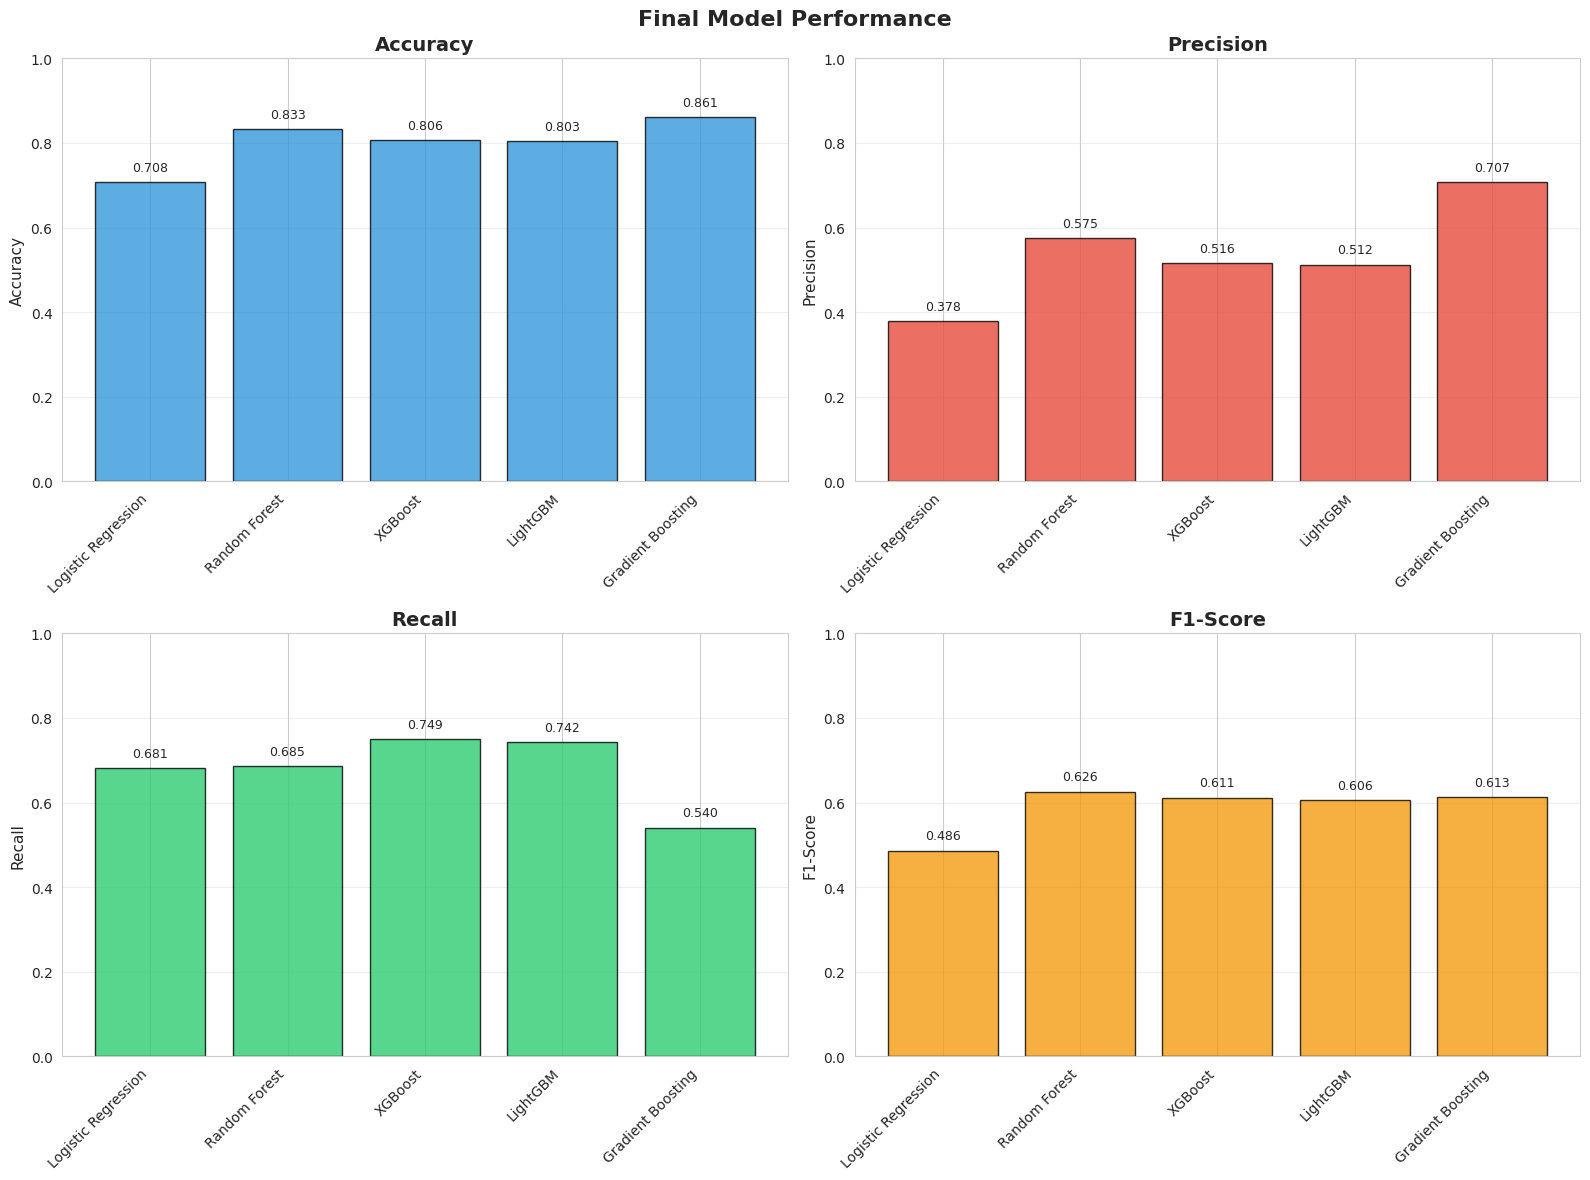

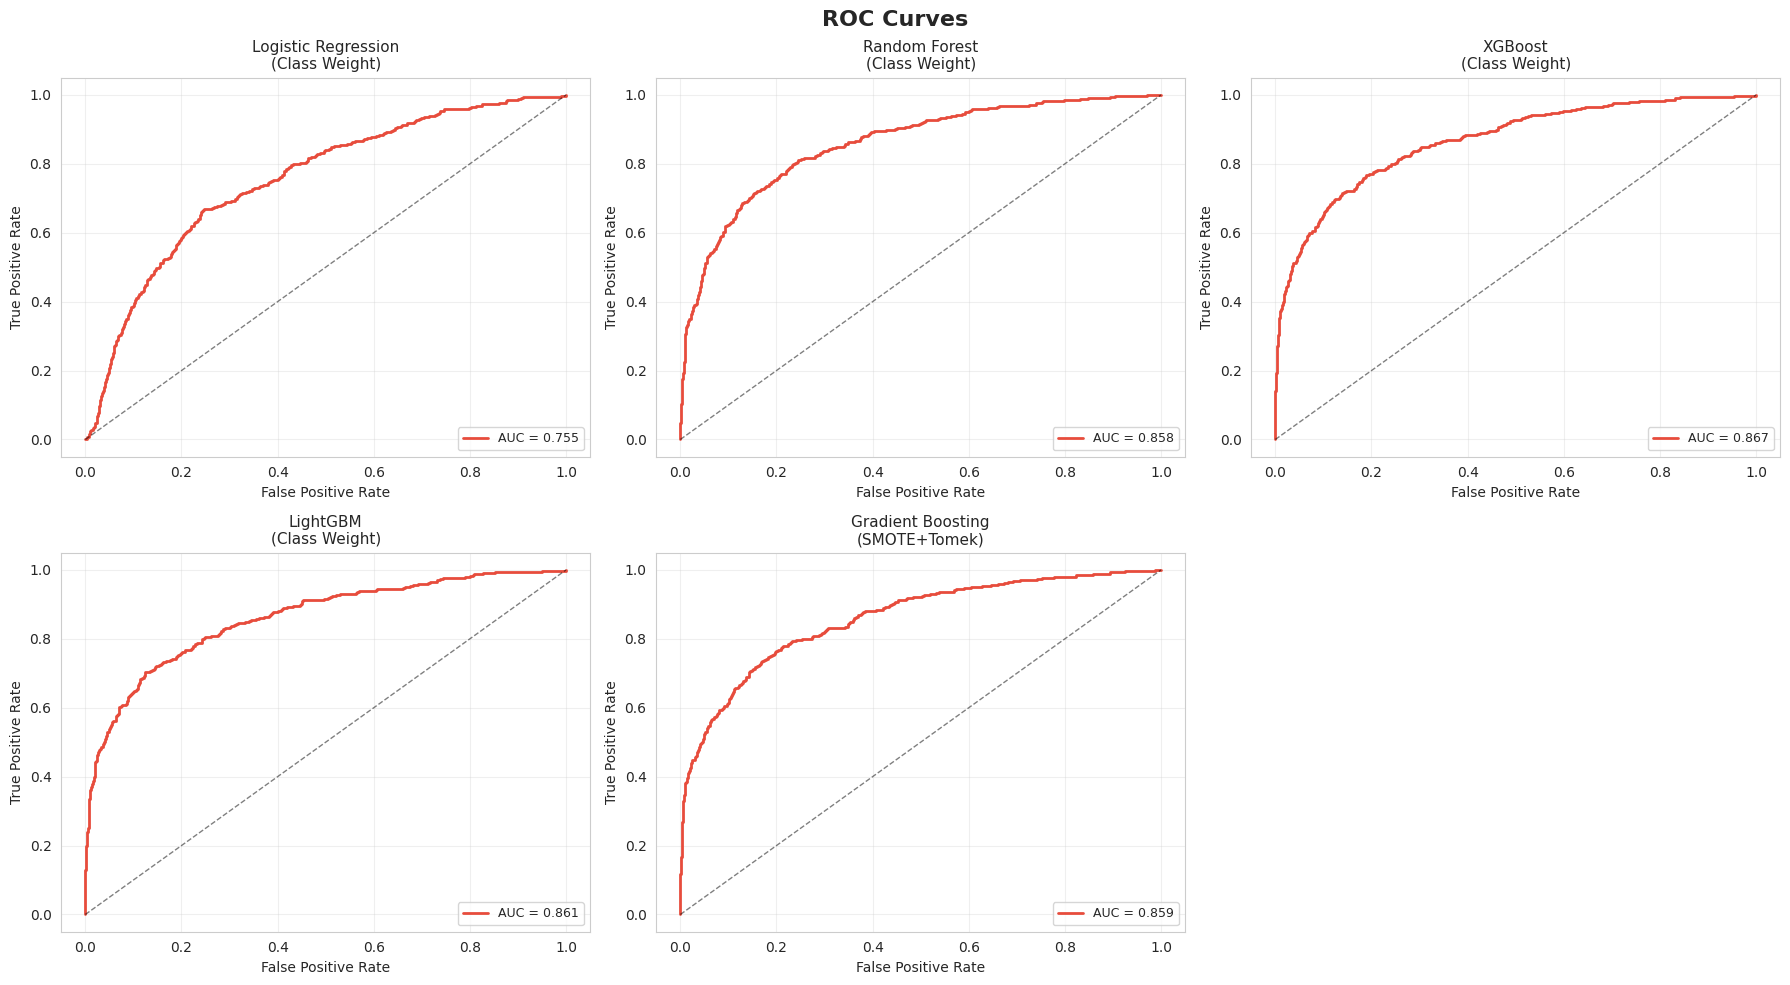

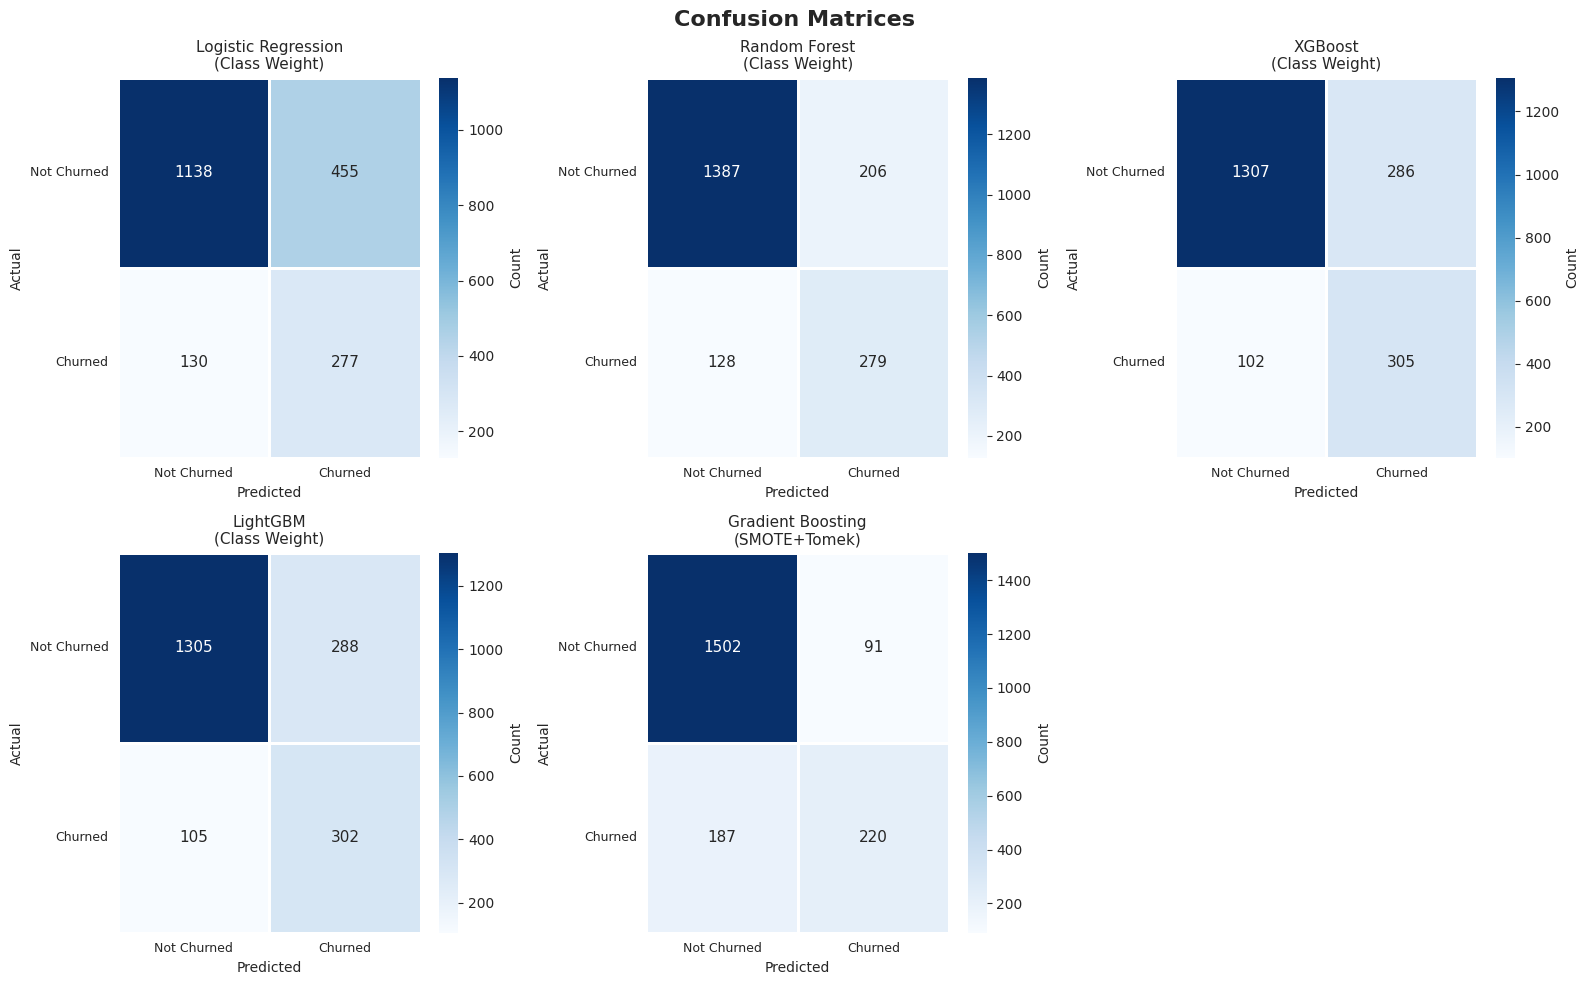


--------------------------------------------------------------------------------
RECOMMENDATION
--------------------------------------------------------------------------------

Best Model: XGBoost (Class Weight)
Recall: 0.7494 | F1-Score: 0.6112

--------------------------------------------------------------------------------


In [ ]:
sns.set_style('whitegrid')
models_config = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
        'data': (X_train, y_train),
        'technique': 'Class Weight'
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42, n_estimators=100, max_depth=15,
                                       min_samples_split=20, min_samples_leaf=10,
                                       max_features='sqrt', max_samples=0.8, class_weight='balanced'),
        'data': (X_train, y_train),
        'technique': 'Class Weight'
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=42, max_depth=5, learning_rate=0.05,
                              subsample=0.8, colsample_bytree=0.8, reg_alpha=0.1,
                              reg_lambda=1.0, eval_metric='logloss',
                              scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1])),
        'data': (X_train, y_train),
        'technique': 'Class Weight'
    },
    'LightGBM': {
        'model': LGBMClassifier(random_state=42, max_depth=6, learning_rate=0.05,
                               min_child_samples=30, subsample=0.8, colsample_bytree=0.8,
                               reg_alpha=0.1, reg_lambda=0.1, class_weight='balanced', verbose=-1),
        'data': (X_train, y_train),
        'technique': 'Class Weight'
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42, max_depth=5,
                                           subsample=0.8, min_samples_split=20,
                                           min_samples_leaf=10),
        'data': (X_train_smotetomek, y_train_smotetomek),
        'technique': 'SMOTE+Tomek'
    }
}

results = []
predictions = {}
trained_models = {}

for name, config in models_config.items():
    model = config['model']
    X_tr, y_tr = config['data']
    technique = config['technique']

    model.fit(X_tr, y_tr)
    trained_models[name] = (model, X_tr, y_tr)

    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]

    results.append({
        'Model': name,
        'Technique': technique,
        'Accuracy': round(accuracy_score(y_test, y_test_pred), 4),
        'Precision': round(precision_score(y_test, y_test_pred), 4),
        'Recall': round(recall_score(y_test, y_test_pred), 4),
        'F1-Score': round(f1_score(y_test, y_test_pred), 4),
        'ROC-AUC': round(roc_auc_score(y_test, y_test_proba), 4)
    })
    predictions[name] = (y_test_pred, y_test_proba)

results_df = pd.DataFrame(results)

print("\nPerformance Results:")
print(results_df.to_string(index=False))

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Final Model Performance', fontsize=16, fontweight='bold')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for idx, metric in enumerate(metrics):
    ax = axes[idx//2, idx%2]
    bars = ax.bar(results_df['Model'], results_df[metric], color=colors[idx], alpha=0.8, edgecolor='black')
    ax.set_title(metric, fontsize=14, fontweight='bold')
    ax.set_ylabel(metric, fontsize=11)
    ax.set_xticklabels(results_df['Model'], rotation=45, ha='right', fontsize=10)
    ax.grid(axis='y', alpha=0.3)
    ax.set_ylim([0, 1])

    for bar, val in zip(bars, results_df[metric]):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02, f'{val:.3f}',
               ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('ROC Curves', fontsize=16, fontweight='bold')

for idx, name in enumerate(models_config.keys()):
    ax = axes[idx//3, idx%3]
    _, y_proba = predictions[name]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)

    ax.plot(fpr, tpr, color='#e74c3c', linewidth=2, label=f'AUC = {auc:.3f}')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=1, alpha=0.5)
    ax.set_title(f"{name}\n({models_config[name]['technique']})", fontsize=11)
    ax.set_xlabel('False Positive Rate', fontsize=10)
    ax.set_ylabel('True Positive Rate', fontsize=10)
    ax.legend(loc='lower right', fontsize=9)
    ax.grid(alpha=0.3)

axes[1, 2].axis('off')
plt.tight_layout()
plt.show()
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Confusion Matrices', fontsize=16, fontweight='bold')

for idx, name in enumerate(models_config.keys()):
    ax = axes[idx//3, idx%3]
    y_pred, _ = predictions[name]
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                cbar_kws={'label': 'Count'}, linewidths=1, annot_kws={'fontsize': 11})
    ax.set_title(f"{name}\n({models_config[name]['technique']})", fontsize=11)
    ax.set_ylabel('Actual', fontsize=10)
    ax.set_xlabel('Predicted', fontsize=10)
    ax.set_xticklabels(['Not Churned', 'Churned'], fontsize=9)
    ax.set_yticklabels(['Not Churned', 'Churned'], rotation=0, fontsize=9)

axes[1, 2].axis('off')
plt.tight_layout()
plt.show()

print("\n" + "-"*80)
print("RECOMMENDATION")
print("-"*80)
best_recall = results_df.loc[results_df['Recall'].idxmax()]
print(f"\nBest Model: {best_recall['Model']} ({best_recall['Technique']})")
print(f"Recall: {best_recall['Recall']:.4f} | F1-Score: {best_recall['F1-Score']:.4f}")
print("\n" + "-"*80)

*Overfitting analysis using 5-fold cross-validation demonstrated that all models achieved good generalization performance, with train-validation gaps below 0.08 and low variance across folds. This confirms the models learn generalizable patterns rather than memorizing training data.*

OVERFITTING ANALYSIS - 5-FOLD CV
1/5 Logistic Regression...
   Gap: 0.0013 ± 0.0110
2/5 Random Forest...
   Gap: 0.0678 ± 0.0067
3/5 XGBoost...
   Gap: 0.0509 ± 0.0045
4/5 LightGBM...
   Gap: 0.0630 ± 0.0058
5/5 Gradient Boosting...
   Gap: 0.0670 ± 0.0124


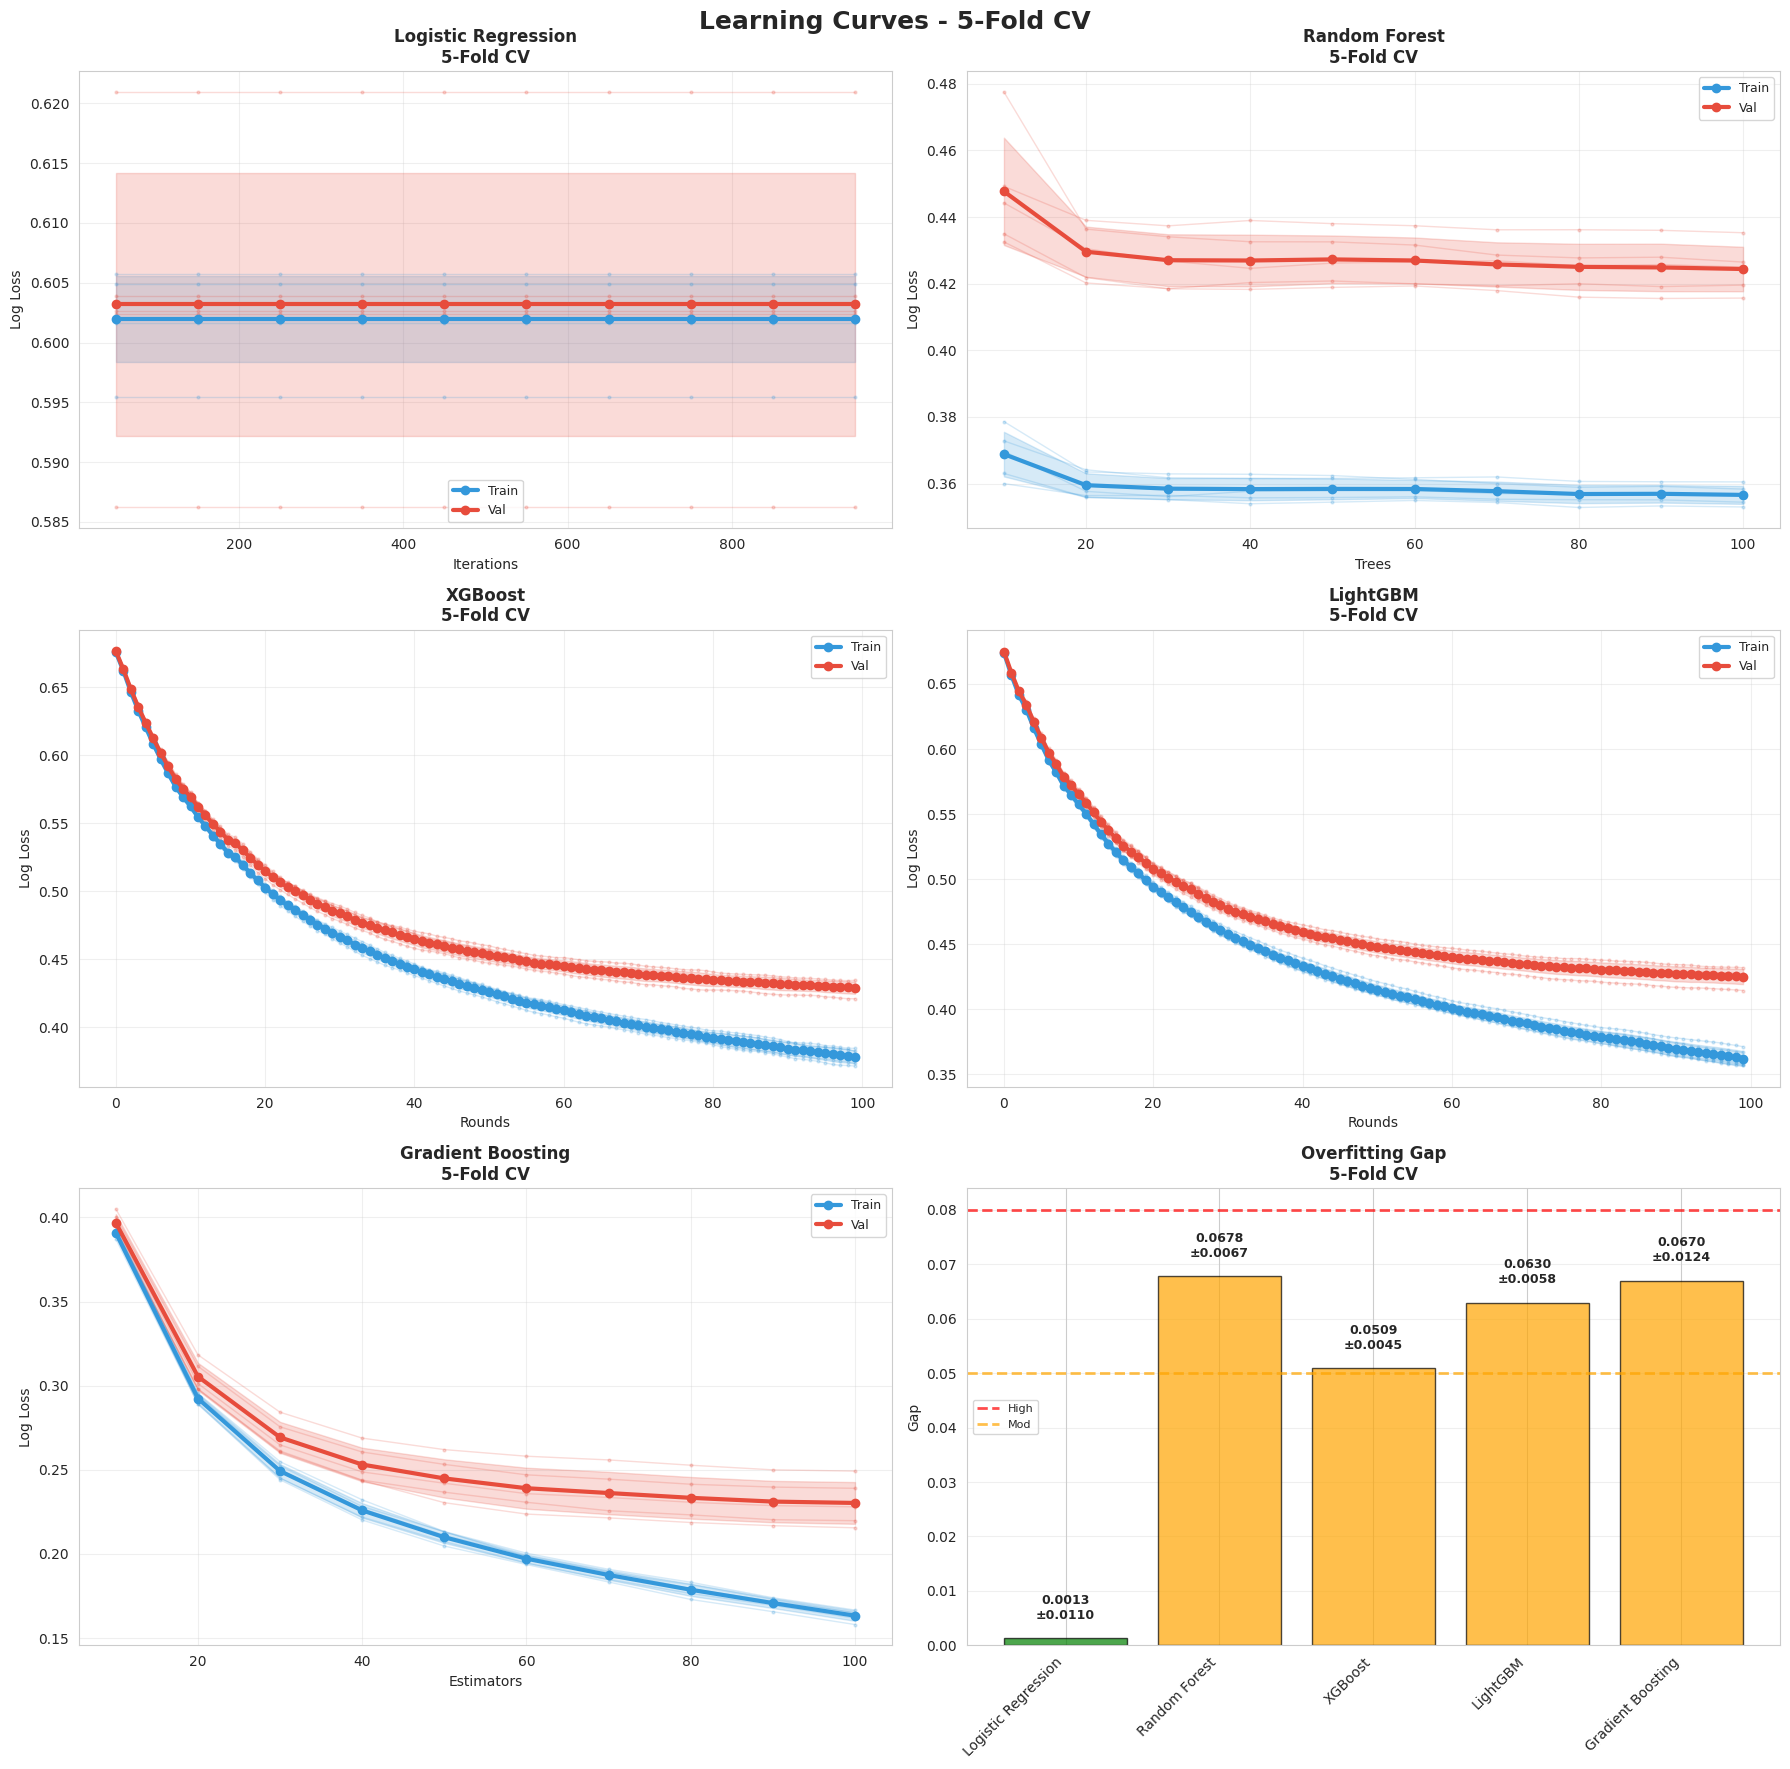


SUMMARY (5-FOLD CV)
Model                  Train      Val        Gap        Std        Status
------------------------------------------------------------------------------------------
Logistic Regression    0.6019     0.6032     0.0013     0.0110     ✅ GOOD
Random Forest          0.3566     0.4244     0.0678     0.0067     ⚡ MOD
XGBoost                0.3782     0.4291     0.0509     0.0045     ⚡ MOD
LightGBM               0.3621     0.4250     0.0630     0.0058     ⚡ MOD
Gradient Boosting      0.1633     0.2303     0.0670     0.0124     ⚡ MOD
✅ Complete! Saved to 'overfitting_cv_summary'


In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss

sns.set_style('whitegrid')
print("="*80); print("OVERFITTING ANALYSIS - 5-FOLD CV"); print("="*80)
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
fig.suptitle('Learning Curves - 5-Fold CV', fontsize=18, fontweight='bold')
overfitting_summary = []

def plot_cv(ax, all_train, all_val, x_vals, title, xlabel):
    m_tr, s_tr = np.mean(all_train, axis=0), np.std(all_train, axis=0)
    m_val, s_val = np.mean(all_val, axis=0), np.std(all_val, axis=0)
    for train, val in zip(all_train, all_val):
        ax.plot(x_vals, train, 'o-', color='#3498db', alpha=0.2, lw=1, ms=2)
        ax.plot(x_vals, val, 'o-', color='#e74c3c', alpha=0.2, lw=1, ms=2)
    ax.plot(x_vals, m_tr, 'o-', color='#3498db', label='Train', lw=3, ms=6)
    ax.plot(x_vals, m_val, 'o-', color='#e74c3c', label='Val', lw=3, ms=6)
    ax.fill_between(x_vals, m_tr-s_tr, m_tr+s_tr, alpha=0.2, color='#3498db')
    ax.fill_between(x_vals, m_val-s_val, m_val+s_val, alpha=0.2, color='#e74c3c')
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=10); ax.set_ylabel('Log Loss', fontsize=10)
    ax.legend(loc='best', fontsize=9); ax.grid(alpha=0.3)
    return m_tr[-1], m_val[-1], s_val[-1]

# 1. LOGISTIC REGRESSION
print("1/5 Logistic Regression...")
from sklearn.linear_model import LogisticRegression
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
iterations, all_train, all_val = range(50, 1001, 100), [], []
for tr_i, val_i in skf.split(X_train, y_train):
    X_tr, X_val, y_tr, y_val = X_train.iloc[tr_i], X_train.iloc[val_i], y_train.iloc[tr_i], y_train.iloc[val_i]
    fold_train, fold_val = [], []
    for m_i in iterations:
        m = LogisticRegression(random_state=42, max_iter=m_i, class_weight='balanced').fit(X_tr, y_tr)
        fold_train.append(log_loss(y_tr, m.predict_proba(X_tr)))
        fold_val.append(log_loss(y_val, m.predict_proba(X_val)))
    all_train.append(fold_train); all_val.append(fold_val)
tr_l, val_l, val_s = plot_cv(axes[0,0], all_train, all_val, iterations, 'Logistic Regression\n5-Fold CV', 'Iterations')
overfitting_summary.append(['Logistic Regression', tr_l, val_l, val_l-tr_l, val_s])
print(f"   Gap: {val_l-tr_l:.4f} ± {val_s:.4f}")


# 2. RANDOM FOREST
print("2/5 Random Forest...")
from sklearn.ensemble import RandomForestClassifier
n_trees, all_train, all_val = range(10, 101, 10), [], []
for tr_i, val_i in skf.split(X_train, y_train):
    X_tr, X_val, y_tr, y_val = X_train.iloc[tr_i], X_train.iloc[val_i], y_train.iloc[tr_i], y_train.iloc[val_i]
    fold_train, fold_val = [], []
    for n in n_trees:
        m = RandomForestClassifier(random_state=42, n_estimators=n, max_depth=15, min_samples_split=20,
                                   min_samples_leaf=10, max_features='sqrt', max_samples=0.8, class_weight='balanced').fit(X_tr, y_tr)
        fold_train.append(log_loss(y_tr, m.predict_proba(X_tr)))
        fold_val.append(log_loss(y_val, m.predict_proba(X_val)))
    all_train.append(fold_train); all_val.append(fold_val)
tr_l, val_l, val_s = plot_cv(axes[0,1], all_train, all_val, n_trees, 'Random Forest\n5-Fold CV', 'Trees')
overfitting_summary.append(['Random Forest', tr_l, val_l, val_l-tr_l, val_s])
print(f"   Gap: {val_l-tr_l:.4f} ± {val_s:.4f}")


# 3. XGBOOST
print("3/5 XGBoost...")
from xgboost import XGBClassifier
all_train, all_val = [], []
for tr_i, val_i in skf.split(X_train, y_train):
    X_tr, X_val, y_tr, y_val = X_train.iloc[tr_i], X_train.iloc[val_i], y_train.iloc[tr_i], y_train.iloc[val_i]
    m = XGBClassifier(random_state=42, max_depth=5, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8,
                     reg_alpha=0.1, reg_lambda=1.0, eval_metric='logloss', n_estimators=100,
                     scale_pos_weight=y_tr.value_counts()[0]/y_tr.value_counts()[1])
    m.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)], verbose=False)
    all_train.append(m.evals_result()['validation_0']['logloss'])
    all_val.append(m.evals_result()['validation_1']['logloss'])
tr_l, val_l, val_s = plot_cv(axes[1,0], all_train, all_val, range(len(all_train[0])), 'XGBoost\n5-Fold CV', 'Rounds')
overfitting_summary.append(['XGBoost', tr_l, val_l, val_l-tr_l, val_s])
print(f"   Gap: {val_l-tr_l:.4f} ± {val_s:.4f}")

# 4. LIGHTGBM
print("4/5 LightGBM...")
from lightgbm import LGBMClassifier
all_train, all_val = [], []
for tr_i, val_i in skf.split(X_train, y_train):
    X_tr, X_val, y_tr, y_val = X_train.iloc[tr_i], X_train.iloc[val_i], y_train.iloc[tr_i], y_train.iloc[val_i]
    m = LGBMClassifier(random_state=42, max_depth=6, learning_rate=0.05, min_child_samples=30, subsample=0.8,
                      colsample_bytree=0.8, reg_alpha=0.1, reg_lambda=0.1, class_weight='balanced', n_estimators=100, verbose=-1)
    m.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)], eval_metric='logloss')
    all_train.append(m.evals_result_['training']['binary_logloss'])
    all_val.append(m.evals_result_['valid_1']['binary_logloss'])
tr_l, val_l, val_s = plot_cv(axes[1,1], all_train, all_val, range(len(all_train[0])), 'LightGBM\n5-Fold CV', 'Rounds')
overfitting_summary.append(['LightGBM', tr_l, val_l, val_l-tr_l, val_s])
print(f"   Gap: {val_l-tr_l:.4f} ± {val_s:.4f}")


# 5. GRADIENT BOOSTING
print("5/5 Gradient Boosting...")
from sklearn.ensemble import GradientBoostingClassifier
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
n_est, all_train, all_val = range(10, 101, 10), [], []
for tr_i, val_i in skf.split(X_train_smotetomek, y_train_smotetomek):
    X_tr, X_val = X_train_smotetomek.iloc[tr_i], X_train_smotetomek.iloc[val_i]
    y_tr, y_val = y_train_smotetomek.iloc[tr_i], y_train_smotetomek.iloc[val_i]
    fold_train, fold_val = [], []
    for n in n_est:
        m = GradientBoostingClassifier(random_state=42, max_depth=5, subsample=0.8,
                                       min_samples_split=20, min_samples_leaf=10, n_estimators=n).fit(X_tr, y_tr)
        fold_train.append(log_loss(y_tr, m.predict_proba(X_tr)))
        fold_val.append(log_loss(y_val, m.predict_proba(X_val)))
    all_train.append(fold_train); all_val.append(fold_val)
tr_l, val_l, val_s = plot_cv(axes[2,0], all_train, all_val, n_est, 'Gradient Boosting\n5-Fold CV', 'Estimators')
overfitting_summary.append(['Gradient Boosting', tr_l, val_l, val_l-tr_l, val_s])
print(f"   Gap: {val_l-tr_l:.4f} ± {val_s:.4f}")

# 6. SUMMARY
df = pd.DataFrame(overfitting_summary, columns=['Model', 'Train', 'Val', 'Gap', 'Std'])
ax = axes[2,1]
colors = ['red' if g>0.08 else 'orange' if g>0.05 else 'green' for g in df['Gap']]
bars = ax.bar(range(len(df)), df['Gap'], color=colors, alpha=0.7, edgecolor='black')
ax.set_xticks(range(len(df))); ax.set_xticklabels(df['Model'], rotation=45, ha='right', fontsize=10)
ax.set_title('Overfitting Gap\n5-Fold CV', fontsize=12, fontweight='bold'); ax.set_ylabel('Gap', fontsize=10)
ax.axhline(0.08, color='red', linestyle='--', lw=2, label='High', alpha=0.7)
ax.axhline(0.05, color='orange', linestyle='--', lw=2, label='Mod', alpha=0.7)
ax.legend(fontsize=8); ax.grid(axis='y', alpha=0.3)
for bar, val, std in zip(bars, df['Gap'], df['Std']):
    ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()+0.003,
            f'{val:.4f}\n±{std:.4f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.tight_layout(); plt.show()

print("\n"+"="*90); print("SUMMARY (5-FOLD CV)"); print("="*90)
print(f"{'Model':<22} {'Train':<10} {'Val':<10} {'Gap':<10} {'Std':<10} {'Status'}")
print("-"*90)
for _, r in df.iterrows():
    s = "⚠️ HIGH" if r['Gap']>0.08 else "⚡ MOD" if r['Gap']>0.05 else "✅ GOOD"
    print(f"{r['Model']:<22} {r['Train']:<10.4f} {r['Val']:<10.4f} {r['Gap']:<10.4f} {r['Std']:<10.4f} {s}")
print("="*90)
overfitting_cv_summary = df
print("✅ Complete! Saved to 'overfitting_cv_summary'")

# Business Cost Analysis (Hypothetical)

--------------------------------------------------------------------------------
BUSINESS COST ANALYSIS - OPTIMIZED MODELS
--------------------------------------------------------------------------------
Cost per False Negative (Missed Churner): $100
Cost per False Positive (Wrong Alert): $10

--------------------------------------------------------------------------------
BUSINESS COST BREAKDOWN
--------------------------------------------------------------------------------
              Model    Technique  FN  FP  Total Cost
Logistic Regression Class Weight 130 455       17550
      Random Forest Class Weight 128 206       14860
            XGBoost Class Weight 102 286       13060
           LightGBM Class Weight 105 288       13380
  Gradient Boosting  SMOTE+Tomek 187  91       19610


/tmp/ipython-input-2912379822.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(cost_df['Model'], rotation=45, ha='right', fontsize=11)
/tmp/ipython-input-2912379822.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(cost_df['Model'], rotation=45, ha='right', fontsize=11)
/tmp/ipython-input-2912379822.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(cost_df['Model'], rotation=45, ha='right', fontsize=11)


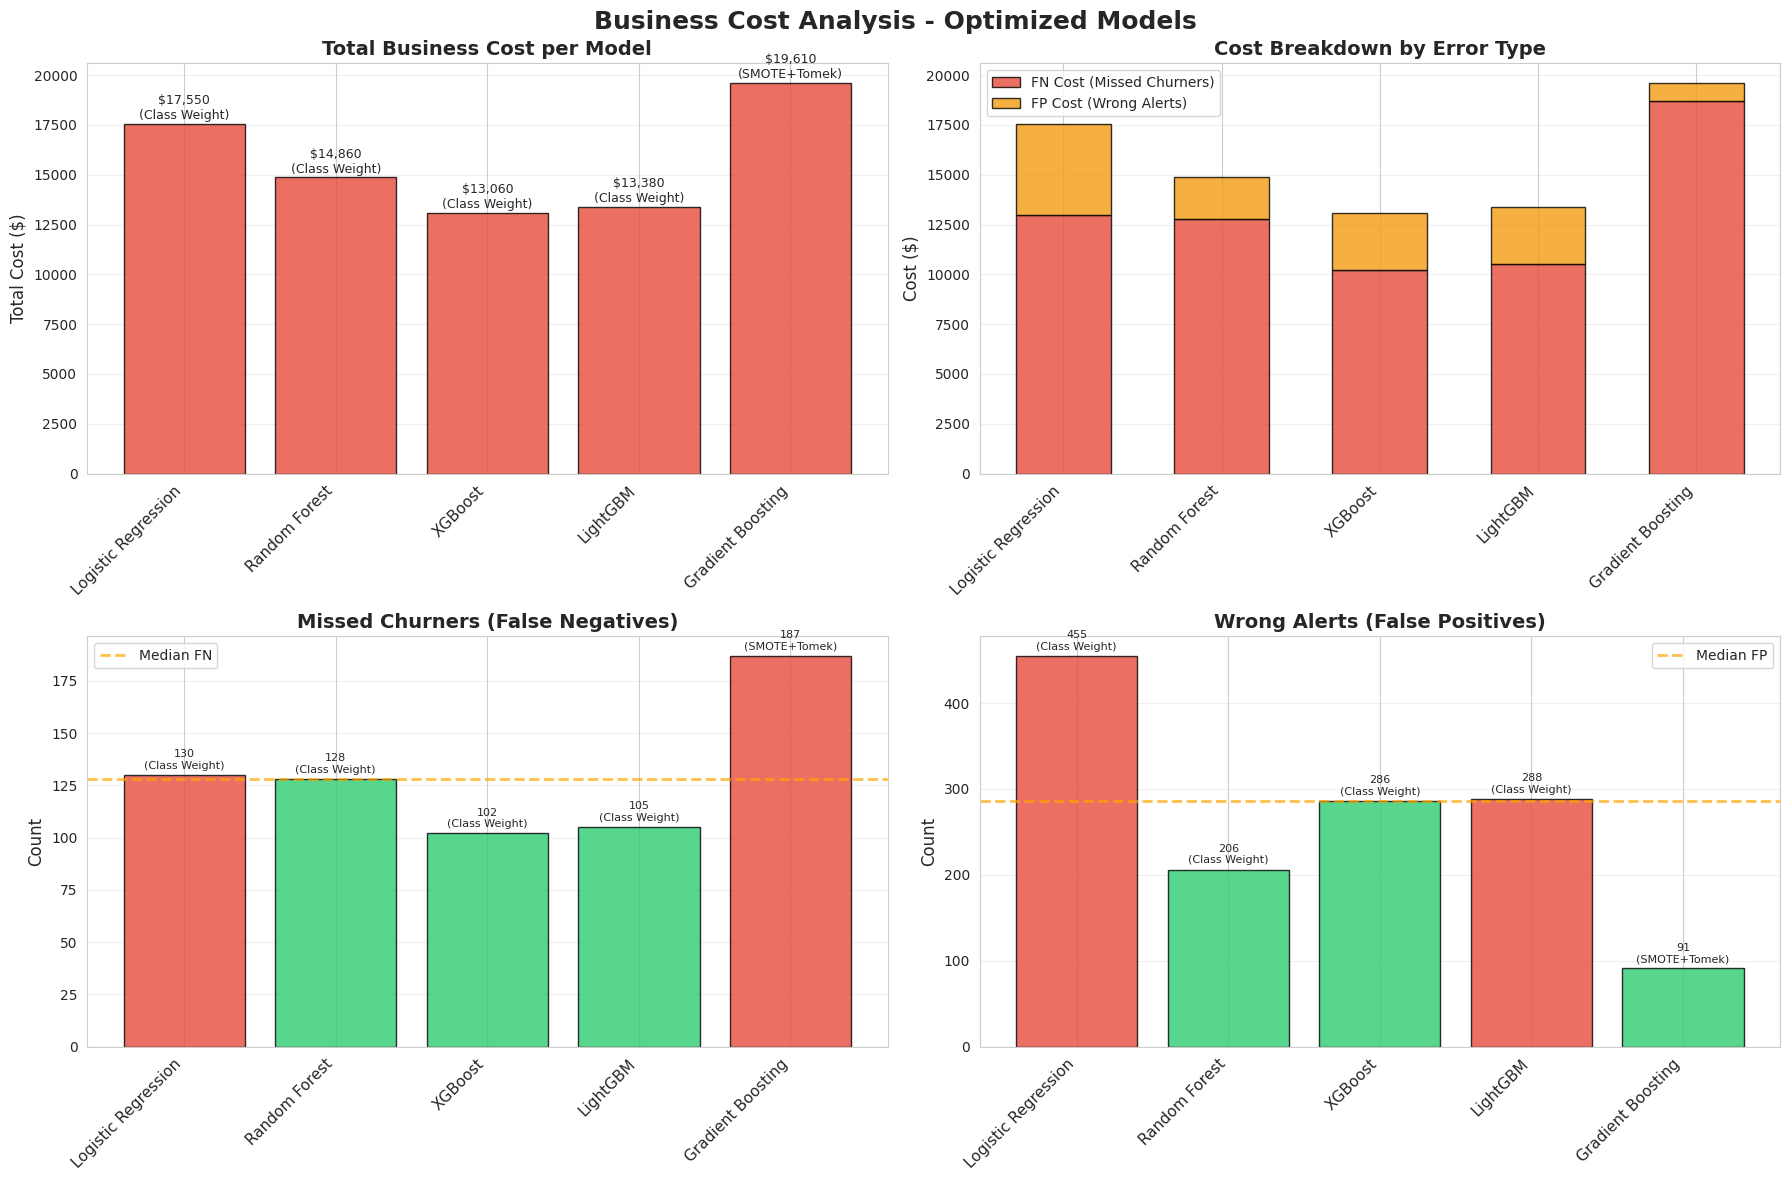


--------------------------------------------------------------------------------
DETAILED COST ANALYSIS
--------------------------------------------------------------------------------

Logistic Regression (Class Weight):
  False Negatives: 130 customers x $100 = $13,000
  False Positives: 455 customers x $10 = $4,550
  Total Cost: $17,550
  FN contributes 74.1% of total cost

Random Forest (Class Weight):
  False Negatives: 128 customers x $100 = $12,800
  False Positives: 206 customers x $10 = $2,060
  Total Cost: $14,860
  FN contributes 86.1% of total cost

XGBoost (Class Weight):
  False Negatives: 102 customers x $100 = $10,200
  False Positives: 286 customers x $10 = $2,860
  Total Cost: $13,060
  FN contributes 78.1% of total cost

LightGBM (Class Weight):
  False Negatives: 105 customers x $100 = $10,500
  False Positives: 288 customers x $10 = $2,880
  Total Cost: $13,380
  FN contributes 78.5% of total cost

Gradient Boosting (SMOTE+Tomek):
  False Negatives: 187 customers 

In [ ]:

sns.set_style('whitegrid')

# Business cost assumptions
COST_FN = 100  # Cost of missing a churner (lost customer)
COST_FP = 10   # Cost of wrong alert (wasted retention effort)

print("-"*80)
print("BUSINESS COST ANALYSIS - OPTIMIZED MODELS")
print("-"*80)
print(f"Cost per False Negative (Missed Churner): ${COST_FN}")
print(f"Cost per False Positive (Wrong Alert): ${COST_FP}")

def calculate_cost(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fn, fp, (fn * COST_FN) + (fp * COST_FP)

# Calculate costs for optimized models
cost_results = []

model_names = ['Logistic Regression', 'Random Forest', 'XGBoost', 'LightGBM', 'Gradient Boosting']
techniques = ['Class Weight', 'Class Weight', 'Class Weight', 'Class Weight', 'SMOTE+Tomek']

for name, technique in zip(model_names, techniques):
    y_pred, _ = predictions[name]
    fn, fp, total_cost = calculate_cost(y_test, y_pred)

    cost_results.append({
        'Model': name,
        'Technique': technique,
        'FN': fn,
        'FP': fp,
        'FN Cost': fn * COST_FN,
        'FP Cost': fp * COST_FP,
        'Total Cost': total_cost
    })

cost_df = pd.DataFrame(cost_results)

print("\n" + "-"*80)
print("BUSINESS COST BREAKDOWN")
print("-"*80)
print(cost_df[['Model', 'Technique', 'FN', 'FP', 'Total Cost']].to_string(index=False))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Business Cost Analysis - Optimized Models', fontsize=18, fontweight='bold')

# Chart 1: Total Cost by Model
ax1 = axes[0, 0]
bars = ax1.bar(cost_df['Model'], cost_df['Total Cost'], color='#e74c3c', alpha=0.8, edgecolor='black')
ax1.set_title('Total Business Cost per Model', fontsize=14, fontweight='bold')
ax1.set_ylabel('Total Cost ($)', fontsize=12)
ax1.set_xticklabels(cost_df['Model'], rotation=45, ha='right', fontsize=11)
ax1.grid(axis='y', alpha=0.3)

for i, (bar, val, tech) in enumerate(zip(bars, cost_df['Total Cost'], cost_df['Technique'])):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 100, f'${int(val):,}\n({tech})',
            ha='center', va='bottom', fontsize=9)

# Chart 2: Cost Breakdown (Stacked)
ax2 = axes[0, 1]
x = np.arange(len(cost_df))
width = 0.6
ax2.bar(x, cost_df['FN Cost'], width, label='FN Cost (Missed Churners)',
        color='#e74c3c', alpha=0.8, edgecolor='black')
ax2.bar(x, cost_df['FP Cost'], width, bottom=cost_df['FN Cost'],
        label='FP Cost (Wrong Alerts)', color='#f39c12', alpha=0.8, edgecolor='black')
ax2.set_title('Cost Breakdown by Error Type', fontsize=14, fontweight='bold')
ax2.set_ylabel('Cost ($)', fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels(cost_df['Model'], rotation=45, ha='right', fontsize=11)
ax2.legend(fontsize=10)
ax2.grid(axis='y', alpha=0.3)

# Chart 3: False Negatives Comparison
ax3 = axes[1, 0]
colors_fn = ['#e74c3c' if fn > cost_df['FN'].median() else '#2ecc71' for fn in cost_df['FN']]
bars = ax3.bar(cost_df['Model'], cost_df['FN'], color=colors_fn, alpha=0.8, edgecolor='black')
ax3.set_title('Missed Churners (False Negatives)', fontsize=14, fontweight='bold')
ax3.set_ylabel('Count', fontsize=12)
ax3.set_xticklabels(cost_df['Model'], rotation=45, ha='right', fontsize=11)
ax3.grid(axis='y', alpha=0.3)
ax3.axhline(y=cost_df['FN'].median(), color='orange', linestyle='--',
           linewidth=2, label='Median FN', alpha=0.7)
ax3.legend(fontsize=10)

for i, (bar, val, tech) in enumerate(zip(bars, cost_df['FN'], cost_df['Technique'])):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 2, f'{int(val)}\n({tech})',
            ha='center', va='bottom', fontsize=8)

# Chart 4: False Positives Comparison
ax4 = axes[1, 1]
colors_fp = ['#e74c3c' if fp > cost_df['FP'].median() else '#2ecc71' for fp in cost_df['FP']]
bars = ax4.bar(cost_df['Model'], cost_df['FP'], color=colors_fp, alpha=0.8, edgecolor='black')
ax4.set_title('Wrong Alerts (False Positives)', fontsize=14, fontweight='bold')
ax4.set_ylabel('Count', fontsize=12)
ax4.set_xticklabels(cost_df['Model'], rotation=45, ha='right', fontsize=11)
ax4.grid(axis='y', alpha=0.3)
ax4.axhline(y=cost_df['FP'].median(), color='orange', linestyle='--',
           linewidth=2, label='Median FP', alpha=0.7)
ax4.legend(fontsize=10)

for i, (bar, val, tech) in enumerate(zip(bars, cost_df['FP'], cost_df['Technique'])):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 5, f'{int(val)}\n({tech})',
            ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Detailed cost analysis
print("\n" + "-"*80)
print("DETAILED COST ANALYSIS")
print("-"*80)

for _, row in cost_df.iterrows():
    print(f"\n{row['Model']} ({row['Technique']}):")
    print(f"  False Negatives: {row['FN']} customers x ${COST_FN} = ${row['FN Cost']:,}")
    print(f"  False Positives: {row['FP']} customers x ${COST_FP} = ${row['FP Cost']:,}")
    print(f"  Total Cost: ${row['Total Cost']:,}")
    print(f"  FN contributes {(row['FN Cost']/row['Total Cost']*100):.1f}% of total cost")

# Best and worst models
print("\n" + "-"*80)
print("COST-BASED RANKING")
print("-"*80)

cost_sorted = cost_df.sort_values('Total Cost')
print("\nRanking by Total Cost (Lower is Better):")
for i, (_, row) in enumerate(cost_sorted.iterrows(), 1):
    print(f"{i}. {row['Model']:20s} ({row['Technique']:15s}): ${row['Total Cost']:,}")

# Best model recommendation
best_model = cost_df.loc[cost_df['Total Cost'].idxmin()]
worst_model = cost_df.loc[cost_df['Total Cost'].idxmax()]

print("\n" + "-"*80)
print("RECOMMENDATION")
print("-"*80)

print(f"\nLowest Cost Model:")
print(f"  Model: {best_model['Model']}")
print(f"  Technique: {best_model['Technique']}")
print(f"  Total Cost: ${int(best_model['Total Cost']):,}")
print(f"  Missed Churners: {int(best_model['FN'])} customers")
print(f"  Wrong Alerts: {int(best_model['FP'])} customers")

cost_diff = worst_model['Total Cost'] - best_model['Total Cost']
print(f"\nCost Savings vs Worst Model ({worst_model['Model']}):")
print(f"  ${int(cost_diff):,} ({(cost_diff/worst_model['Total Cost']*100):.1f}% reduction)")

# Best for minimizing missed churners
best_fn = cost_df.loc[cost_df['FN'].idxmin()]
print(f"\nBest for Minimizing Missed Churners:")
print(f"  Model: {best_fn['Model']}")
print(f"  Technique: {best_fn['Technique']}")
print(f"  Missed only {int(best_fn['FN'])} churners")
print(f"  Total Cost: ${int(best_fn['Total Cost']):,}")

# Summary statistics
print("\n" + "-"*80)
print("SUMMARY STATISTICS")
print("-"*80)
print(f"Average Total Cost: ${int(cost_df['Total Cost'].mean()):,}")
print(f"Average Missed Churners: {int(cost_df['FN'].mean())} customers")
print(f"Average Wrong Alerts: {int(cost_df['FP'].mean())} customers")
print(f"Total Cost Range: ${int(cost_df['Total Cost'].min()):,} - ${int(cost_df['Total Cost'].max()):,}")

print("\n" + "-"*80)